In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import json
from tqdm import tqdm
import glob

# [Title:] Gaia variability Flag crossmatch with the Galactic DR light curves

In [2]:
data_lc0 = pd.read_csv('Data_CSV/galactic_DR_Alert.csv')
len(data_lc0)

40857

In [3]:
data_cross_match = data_lc0[['ztf_id','ra_mean','dec_mean']]
data_cross_match

ztf_id     ra_mean   dec_mean
0      ZTF17aaaaaid  316.390465  51.057448
1      ZTF17aaaaawv  320.840634  46.869649
2      ZTF17aaaabme   52.002282  47.582143
3      ZTF17aaaabnu   50.974832  46.119865
4      ZTF17aaaacmu   81.745899   3.667373
...             ...         ...        ...
40852  ZTF24abufdjz   81.082469  -3.857420
40853  ZTF24abuovwg   30.518114  43.672247
40854  ZTF24abusycw  100.277011  -8.430257
40855  ZTF24abuvgsj  133.846197 -25.388335
40856  ZTF24abuwyzg  306.517027  44.500387

[40857 rows x 3 columns]

In [4]:
data_gaia = pd.read_csv('/media3/CRP8/TDE/data/GAIA_data/galactic_DR_alerts_gaia_matched.csv')

In [5]:
data_gaia['ra_mean'] = data_gaia['RA']
data_gaia['dec_mean'] = data_gaia['DEC']
data_gaia

RA        DEC        Source         SolID    Classifier  \
0      316.390465  51.057448  2.169366e+18  3.753167e+17  nTransits:5+   
1      320.840634  46.869649  1.972365e+18  3.753167e+17  nTransits:5+   
2       52.002282  47.582143           NaN           NaN           NaN   
3       50.974832  46.119865           NaN           NaN           NaN   
4       81.745899   3.667373           NaN           NaN           NaN   
...           ...        ...           ...           ...           ...   
40852   81.082469  -3.857420           NaN           NaN           NaN   
40853   30.518114  43.672247           NaN           NaN           NaN   
40854  100.277011  -8.430257           NaN           NaN           NaN   
40855  133.846197 -25.388335  5.652622e+18  3.753167e+17  nTransits:5+   
40856  306.517027  44.500387           NaN           NaN           NaN   

            Class   ClassSc     RA_ICRS   DEC_ICRS  Separation     ra_mean  \
0             ECL  0.165152  316.390475  51.057448    0.022093  316.390465   
1             YSO  0.574838  320.840661  46.869650    0.067700  320.840634   
2             NaN       NaN         NaN        NaN         NaN   52.002282   
3             NaN       NaN         NaN        NaN         NaN   50.974832   
4             NaN       NaN         NaN        NaN         NaN   81.745899   
...           ...       ...         ...        ...         ...         ...   
40852         NaN       NaN         NaN        NaN         NaN   81.082469   
40853         NaN       NaN         NaN        NaN         NaN   30.518114   
40854         NaN       NaN         NaN        NaN         NaN  100.277011   
40855  SOLAR_LIKE  0.572457  133.846264 -25.388357    0.233879  133.846197   
40856         NaN       NaN         NaN        NaN         NaN  306.517027   

        dec_mean  
0      51.057448  
1      46.869649  
2      47.582143  
3      46.119865  
4       3.667373  
...          ...  
40852  -3.857420  
40853  43.672247  
40854  -8.430257  
40855 -25.388335  
40856  44.500387  

[40857 rows x 12 columns]

In [6]:
data_all0 = pd.merge(
    data_cross_match,
    data_gaia,
    on=['ra_mean', 'dec_mean'],  
    how='inner')                  


In [7]:
len(data_all0)

40857

In [9]:
data_all0.columns, len(data_all0)

(Index(['ztf_id', 'ra_mean', 'dec_mean', 'RA', 'DEC', 'Source', 'SolID',
        'Classifier', 'Class', 'ClassSc', 'RA_ICRS', 'DEC_ICRS', 'Separation'],
       dtype='object'),
 40857)

In [10]:
data_all0 = data_all0[['ztf_id', 'Source', 'SolID', 'Classifier',
       'Class', 'ClassSc', 'RA_ICRS', 'DEC_ICRS', 'Separation']]
data_all0['Class']=data_all0['Class'].fillna("Unknown")

In [11]:
#data_all0.to_csv('Data_CSV/gaia_ztfID_crossmatch.csv',index=False)

In [ ]:
#data_all['Class'],data_all['ClassSc'], data_all['Classifier']

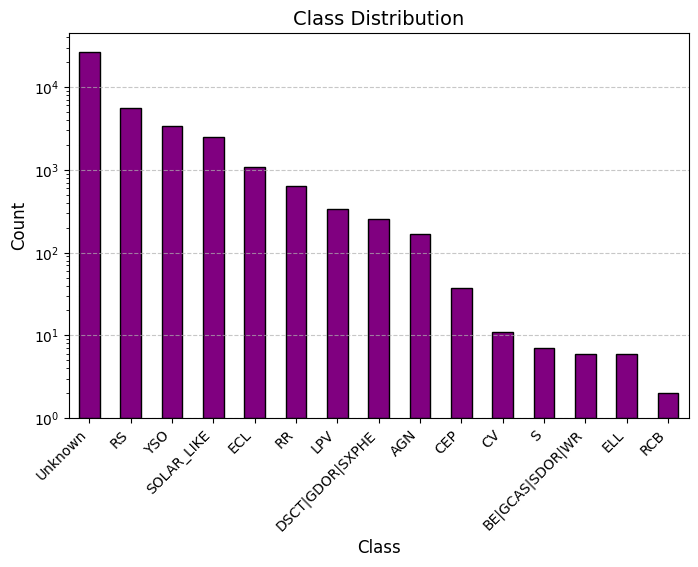

In [115]:
counts = data_all['Class'].value_counts()
counts
# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="purple", edgecolor="black", log=True)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [116]:
data_all[data_all['Class']=='Unknown']

ztf_id                                             obj_id  \
2      ZTF17aaaabme  ['741107100001245', '741107100001245', '741107...   
3      ZTF17aaaabnu  ['741107300010608', '741107300010608', '741107...   
4      ZTF17aaaacmu  ['458107100009417', '458107100009417', '458107...   
8      ZTF17aaaahfr  ['741102300001446', '741102300001446', '741102...   
9      ZTF17aaaahin  ['700115100000809', '700115100000809', '700115...   
...             ...                                                ...   
40851  ZTF24abttorp  ['412104200002848', '412104200002848', '412104...   
40852  ZTF24abufdjz  ['407105300006839', '407105300006839', '407105...   
40853  ZTF24abuovwg  ['697114100005003', '697114100005003', '697114...   
40854  ZTF24abusycw  ['358109100008930', '358109100008930', '358109...   
40856  ZTF24abuwyzg  ['767101400006240', '767101400006240', '767101...   

                                                     mjd  \
2      [58206.16243, 58304.46498, 58318.45263, 58325....   
3      [58204.13955, 58204.16763, 58206.14253, 58206....   
4      [58344.48205, 58350.46471, 58350.46562, 58360....   
8      [58206.14257, 58206.16235, 58304.46488, 58305....   
9      [58301.47955, 58304.4644, 58307.4655, 58312.48...   
...                                                  ...   
40851  [58204.18534, 58204.19932, 58207.21921, 58207....   
40852  [58204.15251, 58344.48137, 58361.47739, 58367....   
40853  [58275.47708, 58279.46479, 58283.44644, 58286....   
40854  [58373.50078, 58376.49789, 58379.47989, 58383....   
40856  [58207.49198, 58210.5151, 58236.40479, 58236.4...   

                                                     mag  \
2      [17.920578, 17.905254, 17.84411, 17.804264, 17...   
3      [16.933643, 16.953825, 16.911127, 16.886408, 1...   
4      [16.805843, 16.8782, 16.84069, 16.635311, 16.6...   
8      [14.422672, 14.436035, 14.421242, 14.429173, 1...   
9      [14.819693, 14.856781, 14.820452, 14.782416, 1...   
...                                                  ...   
40851  [16.976707, 16.930618, 16.953678, 16.937153, 1...   
40852  [18.471687, 18.214725, 18.346283, 18.410812, 1...   
40853  [17.390087, 17.343067, 17.427847, 17.351442, 1...   
40854  [18.53215, 18.532576, 18.525528, 18.629528, 18...   
40856  [15.847355, 15.844105, 15.842059, 15.837912, 1...   

                                                  magerr  \
2      [0.026102087, 0.025909849, 0.02516896, 0.02470...   
3      [0.0188439, 0.018953344, 0.01872428, 0.0185959...   
4      [0.01606354, 0.016468365, 0.016254848, 0.01521...   
8      [0.013744488, 0.013746171, 0.013744311, 0.0137...   
9      [0.011921131, 0.011934627, 0.0119213965, 0.011...   
...                                                  ...   
40851  [0.02041661, 0.020109328, 0.020261405, 0.02015...   
40852  [0.04182294, 0.03544286, 0.038532533, 0.040181...   
40853  [0.019764517, 0.019389767, 0.020079952, 0.0194...   
40854  [0.046747968, 0.046760958, 0.04654582, 0.04984...   
40856  [0.014364816, 0.01435658, 0.014351405, 0.01434...   

                                                    band  \
2      ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
3      ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
4      ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
8      ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
9      ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
...                                                  ...   
40851  ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
40852  ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
40853  ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
40854  ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   
40856  ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...   

                                               finkclass  \
2      ['YSO', 'Unknown', 'YSO', 'YSO', 'YSO', 'YSO',...   
3      ['Unknown', 'Unknown', 'Unknown', 'Unknown', '...   
4      ['TTau*', 'TTau*', 'TTau*', 'TTau*', 'TTauri*'...   


In [123]:
def peak_cut_band(row, sigma_cut=1):
    # parse arrays from row
    bands = np.array(ast.literal_eval(row["band"]))  
    mags = np.array(ast.literal_eval(row["mag"]))
    quality_flag = np.array(row["catflags"])  # already an array per your earlier step
    if len(mags) != len(quality_flag):
        print(f"Length mismatch for ztf_id={row['ztf_id']}: mags={len(mags)}, flags={len(quality_flag)}")

    # keep only good quality points
    good_mask = quality_flag == 0
    mags = mags[good_mask]
    bands1 = bands[good_mask]
   

    if len(mags) == 0:
        return False  # nothing to work with

    median = np.mean(mags)
    sigma = np.std(mags)

    peaks = {}
    for band in ['g', 'r']:
        mask = bands == band
        if mask.sum() > 0:
            peaks[band] = mags[mask].min()
        else:
            peaks[band] = np.nan

    keep = (
        (not np.isnan(peaks['g'])) and 
        (not np.isnan(peaks['r'])) and 
        (peaks['g'] + sigma_cut * sigma < median) and 
        (peaks['r'] < median - sigma_cut * sigma)
    )

    return keep

# Only Unknown objects
unknown_data = data_all[data_all["Class"] == "Unknown"]

for sigma_cut in [1, 2, 3]:
    df_selected = unknown_data[unknown_data.apply(peak_cut_band, axis=1, sigma_cut=sigma_cut)]
    print(f"Sigma {sigma_cut}: Selected {len(df_selected)} / {len(unknown_data)} objects")


Length mismatch for ztf_id=ZTF17aaaabme: mags=716, flags=1879


IndexError: boolean index did not match indexed array along axis 0; size of axis is 716 but size of corresponding boolean axis is 1879

In [51]:
df_selected

ztf_id                                             obj_id  \
1878   ZTF18aacbvor  ['577105100022603', '577105100022603', '577105...   
2322   ZTF18aaklnzi  ['627114400000870', '627114400000870', '627114...   
2373   ZTF18aampkoq  ['724115300003554', '724115300003554', '724115...   
2574   ZTF18aatibsa  ['756113400011546', '756113400011546', '756113...   
4874   ZTF18abckaix  ['803102100024105', '803102100024105', '803102...   
5745   ZTF18abedmlt  ['577105100011303', '577105100011303', '577105...   
6614   ZTF18abhqadz  ['769102200041093', '769102200041093', '769102...   
7068   ZTF18abjgzkw  ['594104100012737', '594104100012737', '594104...   
7271   ZTF18abjxwjj  ['479301100019233', '479301100019233', '479301...   
7681   ZTF18ablprun  ['770107300036526', '770107300036526', '770107...   
7971   ZTF18abmeytq  ['742114100006072', '742114100006072', '742114...   
10024  ZTF18abtosws  ['850110400004438', '850110400004438', '850110...   
12883  ZTF18acdotum  ['775113300023149', '775113300023149', '775113...   
13708  ZTF18acgoczu  ['461116100035211', '461116100035211', '461116...   
18568  ZTF18acweazg  ['360110400020269', '360110400020269', '360110...   
21291  ZTF18adljihl  ['594104100012737', '594104100012737', '594104...   
21974  ZTF19aaalxig  ['261112300042683', '261112300042683', '261112...   
21976  ZTF19aaamerj  ['261101400025037', '261101400025037', '261101...   
21990  ZTF19aaaofur  ['261112300042683', '261112300042683', '261112...   
22444  ZTF19aabyzvw  ['577105100011303', '577105100011303', '577105...   
22449  ZTF19aabztfd  ['577105100023799', '577105100023799', '577105...   
23261  ZTF19aaeqbve  ['356115100013996', '356115100013996', '356115...   
23545  ZTF19aaikyas  ['751116100006318', '751116100006318', '751116...   
23968  ZTF19aamnudr  ['355105100003191', '355105100003191', '355105...   
26274  ZTF19abdoqzc  ['384104400053041', '384104400053041', '384104...   
27648  ZTF19abtncmr  ['384104400021636', '384104400021636', '384104...   
28211  ZTF19abykxyl  ['831113100011451', '831113100011451', '831113...   
28460  ZTF19acabkxk  ['432107300020472', '432107300020472', '432107...   
31685  ZTF20aafnbaf  ['459109400015064', '459109400015064', '459109...   
33982  ZTF20abxihid  ['804107300002375', '804107300002375', '804107...   
37073  ZTF21aasqdbu  ['577105100023867', '577105100023867', '577105...   
37759  ZTF21abpulfj  ['850114400007378', '850114400007378', '850114...   
37951  ZTF21acbmarl  ['607101300010124', '607101300010124', '607101...   
40008  ZTF23aakaegd  ['841110200003866', '841110200003866', '841110...   

                                                     mjd  \
1878   [58202.31605, 58202.34101, 58205.31098, 58205....   
2322   [58202.37827, 58205.30895, 58205.35095, 58208....   
2373   [58203.49961, 58203.50056, 58204.40938, 58204....   
2574   [58202.29212, 58202.29859, 58202.29955, 58202....   
4874   [58228.4866, 58232.49929, 58234.41999, 58235.4...   
5745   [58202.31606, 58202.34101, 58205.31099, 58205....   
6614   [58209.50089, 58210.51183, 58211.50757, 58228....   
7068   [58228.4849, 58232.49954, 58236.43187, 58261.4...   
7271   [58277.17237, 58286.19468, 58295.32116, 58332....   
7681   [58229.50307, 58234.41978, 58234.50118, 58235....   
7971   [58206.16227, 58304.47694, 58305.47752, 58307....   
10024  [58207.41226, 58207.4613, 58210.51735, 58244.4...   
12883  [58269.47827, 58277.46091, 58279.4641, 58280.4...   
13708  [58204.1525, 58204.20425, 58205.13251, 58205.1...   
18568  [58206.13451, 58206.17021, 58207.21885, 58207....   
21291  [58228.4849, 58232.49954, 58236.43187, 58261.4...   
21974  [58206.13633, 58206.19326, 58429.4806, 58430.5...   
21976  [58206.1369, 58206.19383, 58229.14231, 58427.5...   
21990  [58206.13633, 58206.19326, 58429.4806, 58430.5...   
22444  [58202.31606, 58202.34101, 58205.31099, 58205....   
22449  [58202.31606, 58202.34101, 58205.31099, 58205....   
23261  [58204.15214, 58360.47682, 58363.50229, 58366....   
23545  [58202.27969, 58205.21045, 58205.25

In [72]:
row_alert = df_selected.loc[df_selected['ztf_id'] == ztfid]
np.unique(ast.literal_eval(row_alert['cat_id'][1878]))

array(['HuntOCs_2_427916', 'Hunt_ReffertOCmembers_527916'], dtype='<U28')

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


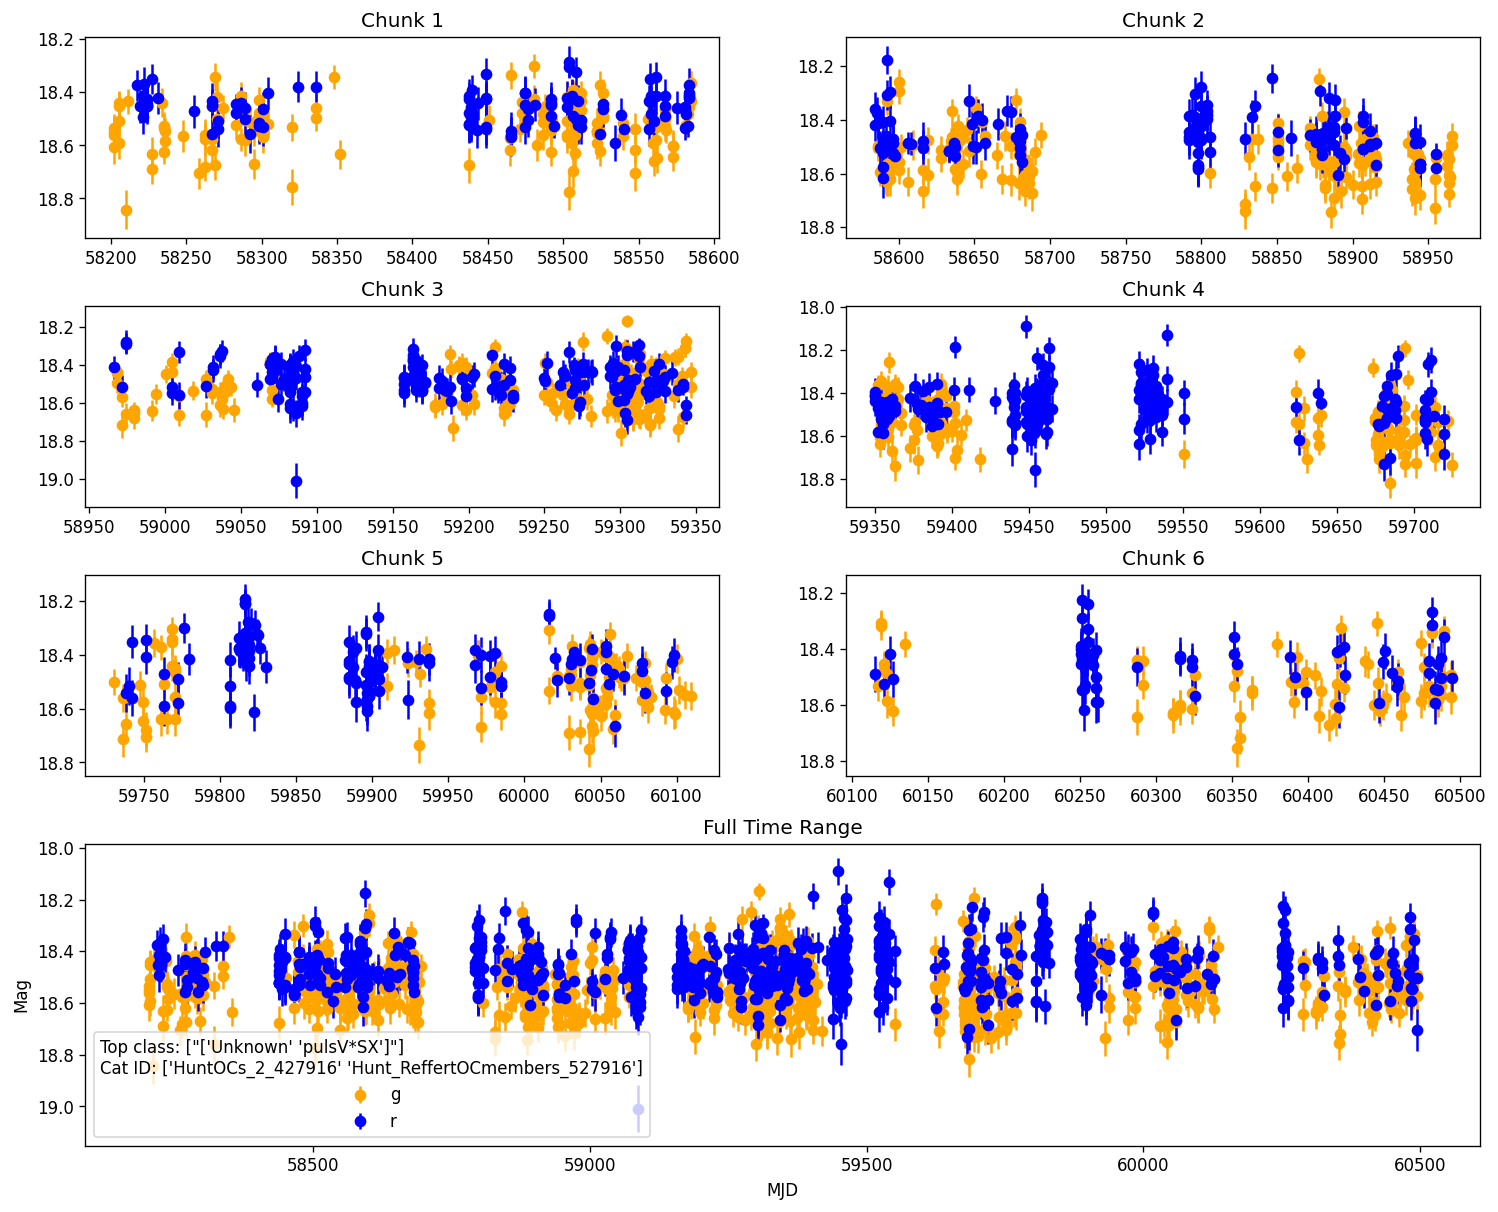

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


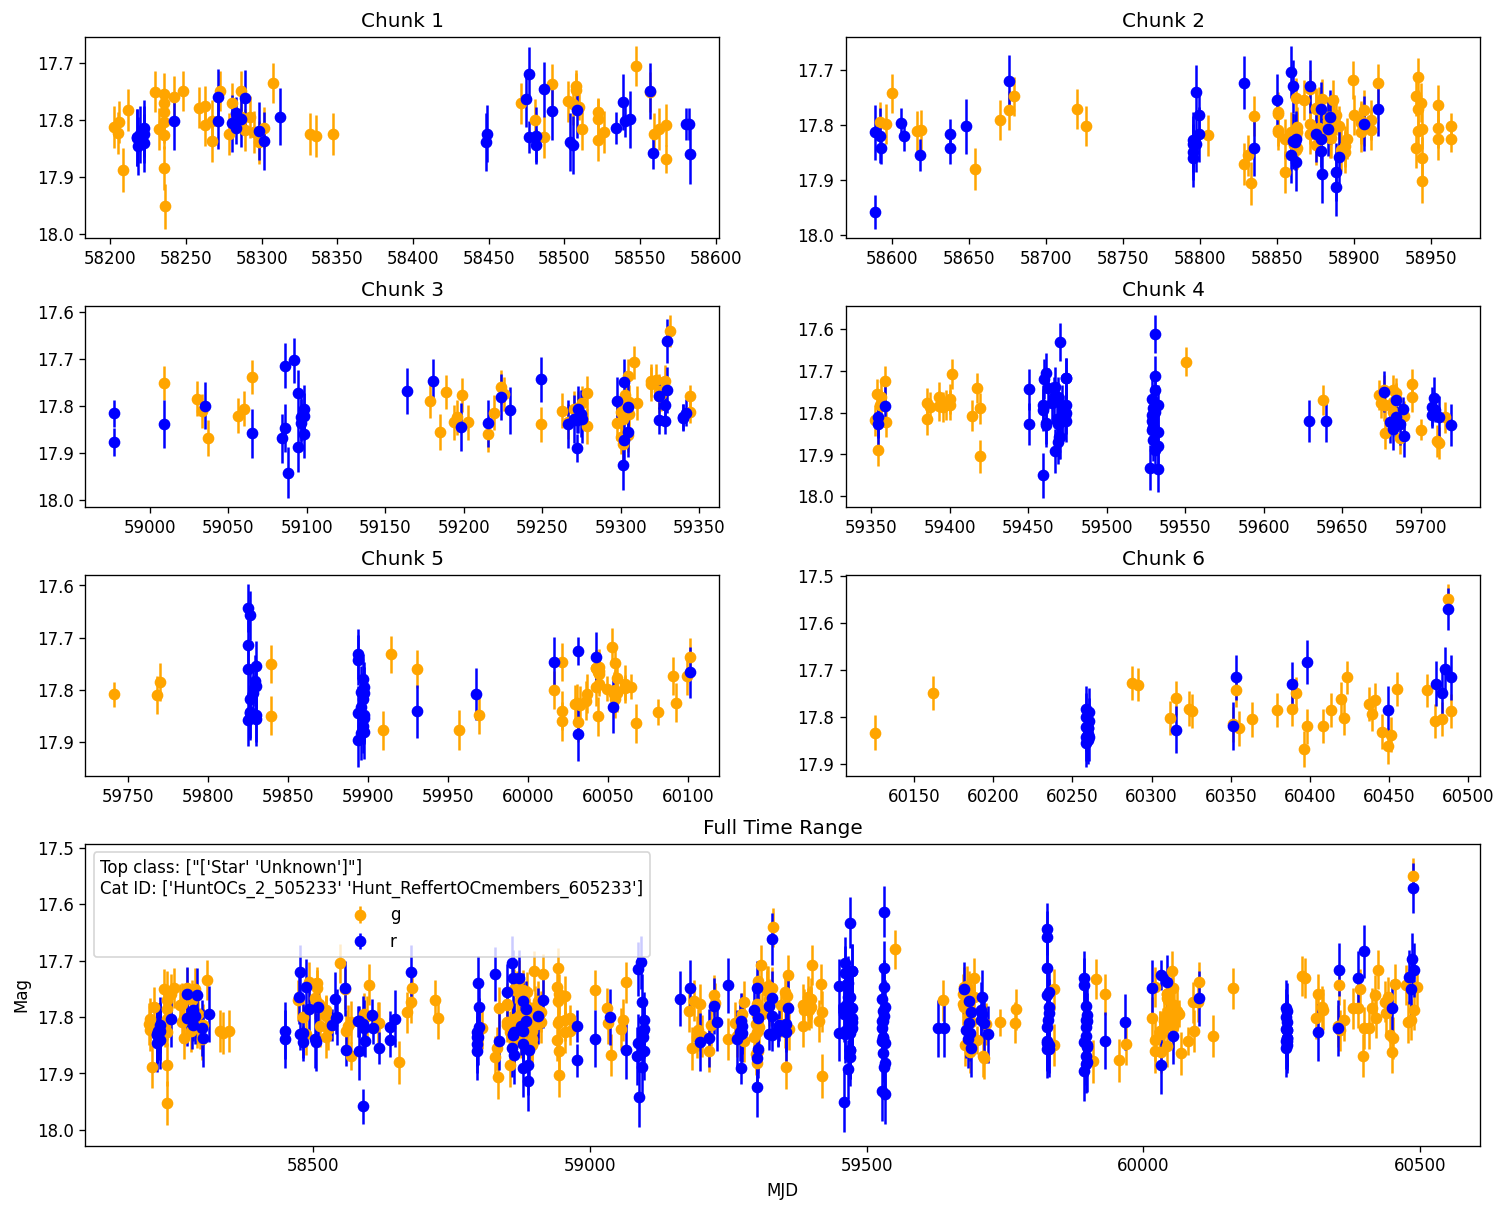

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


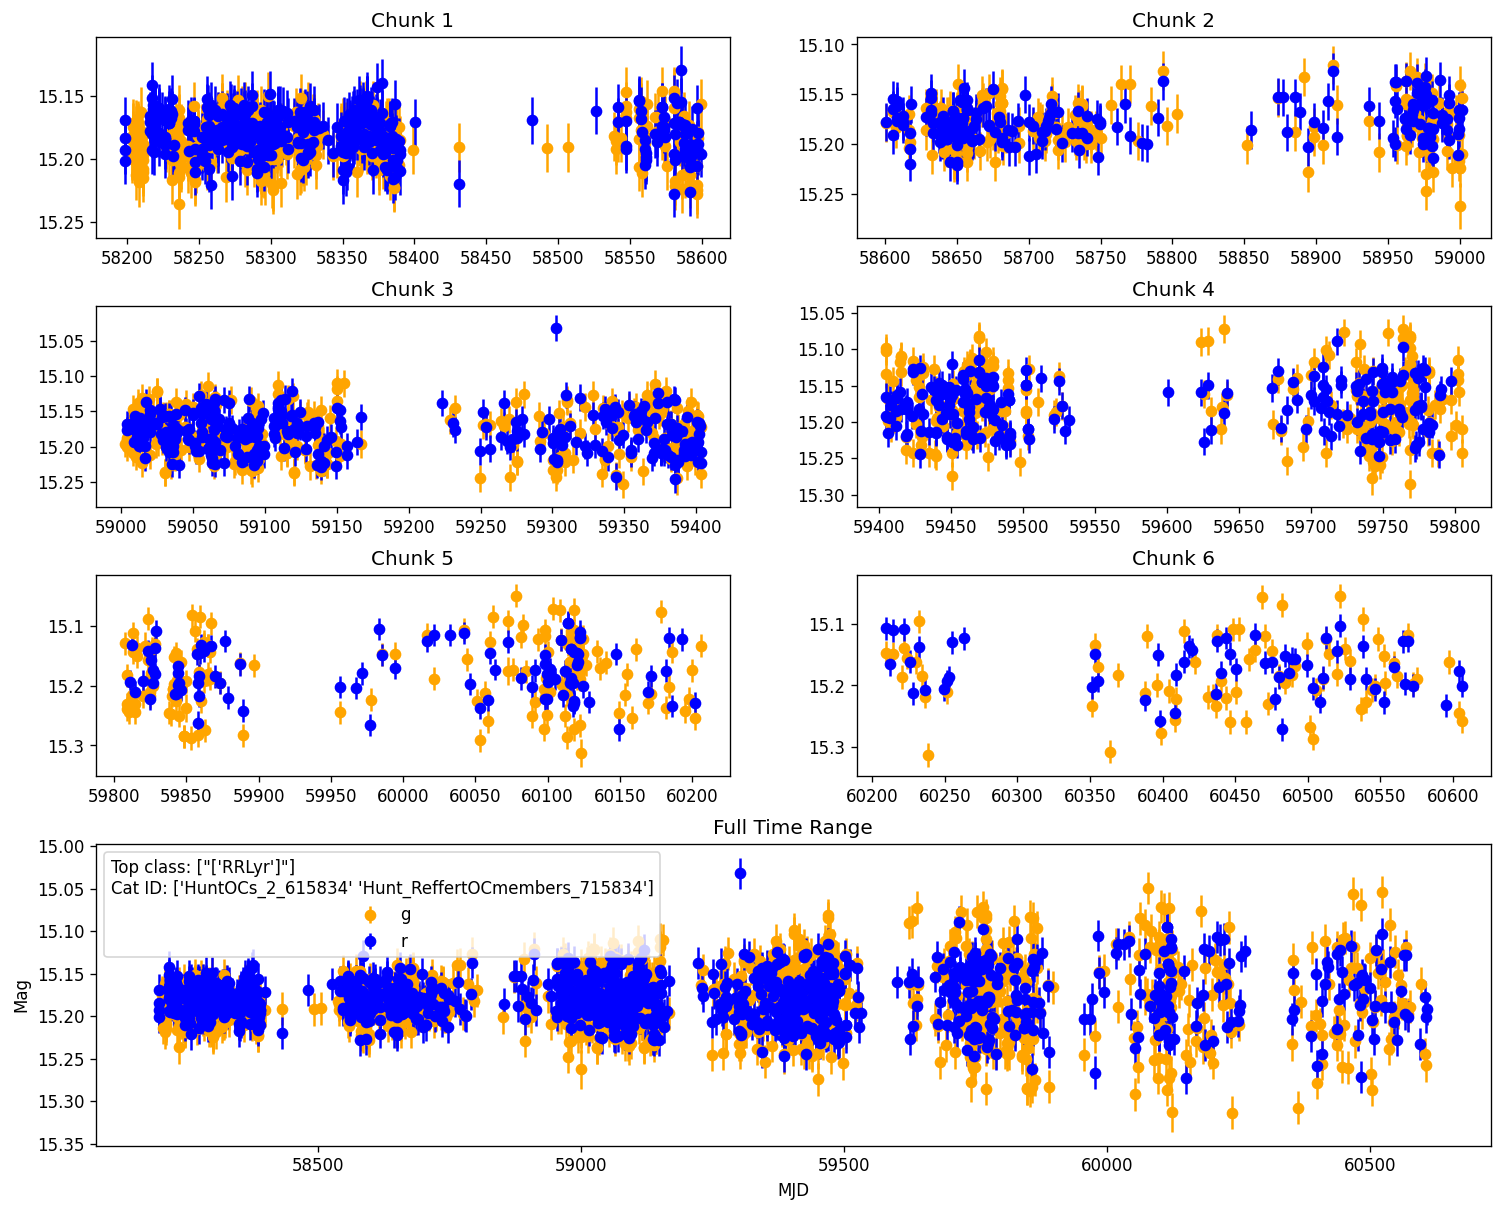

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


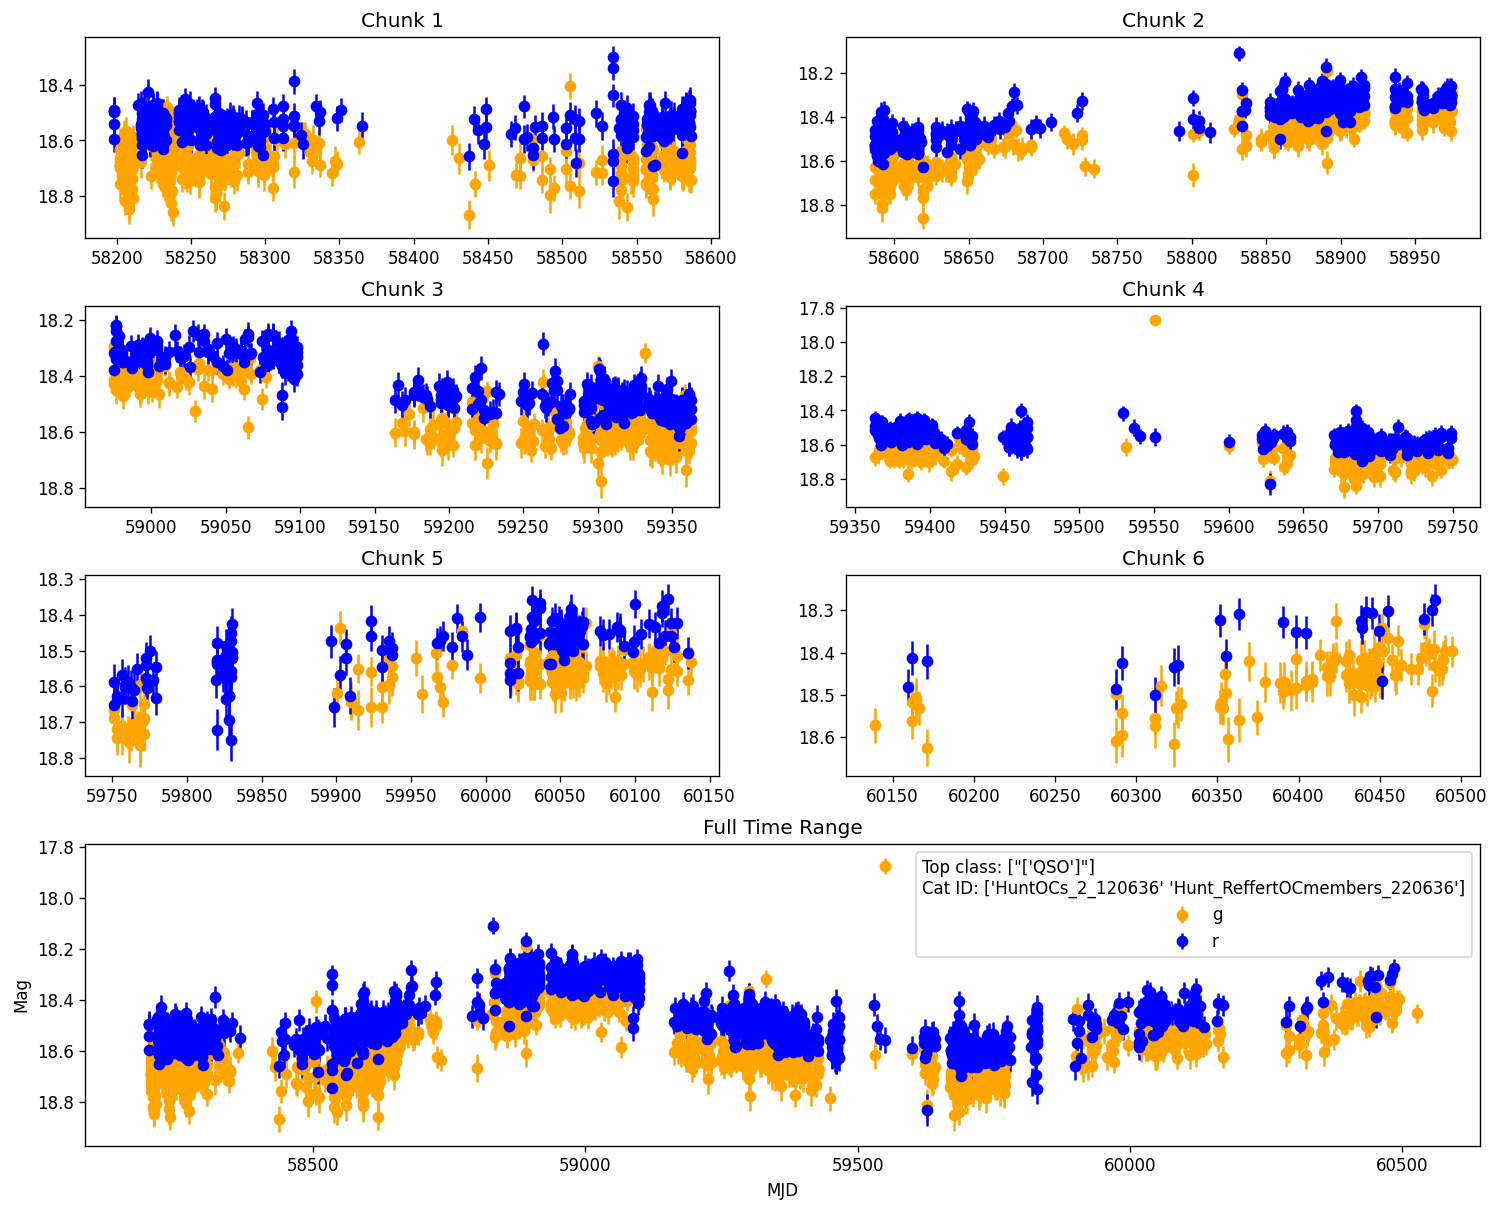

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


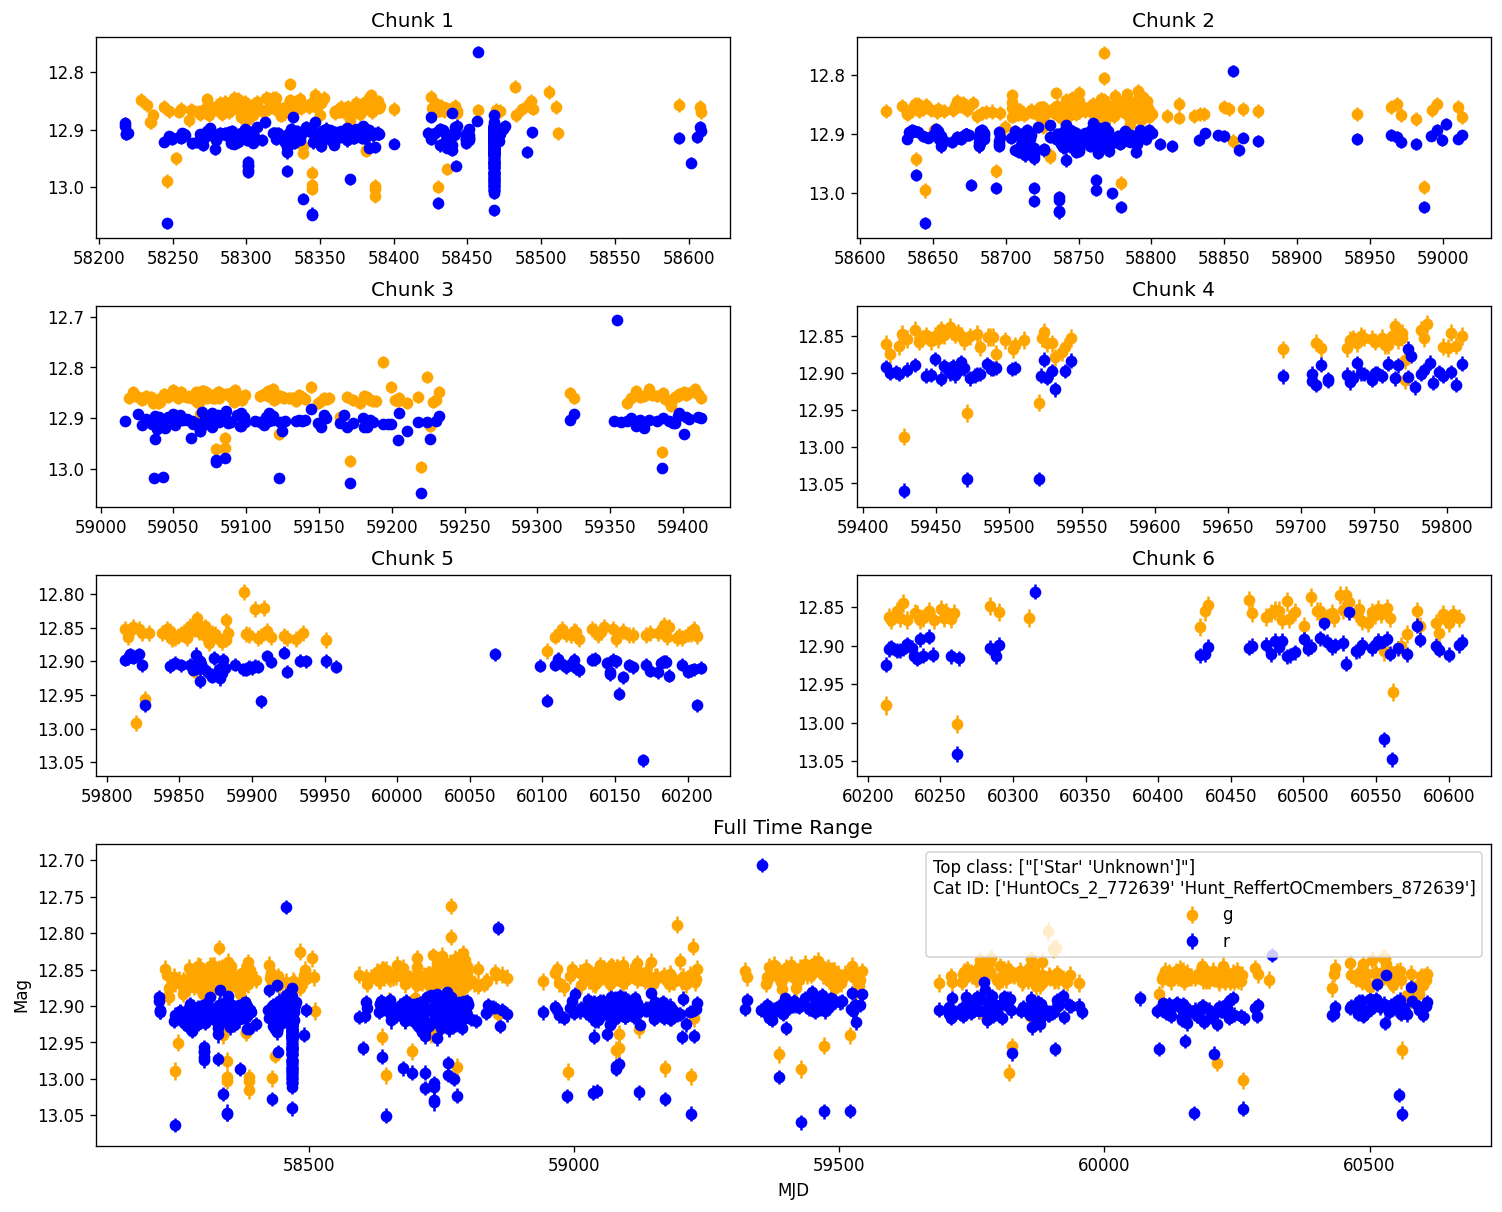

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


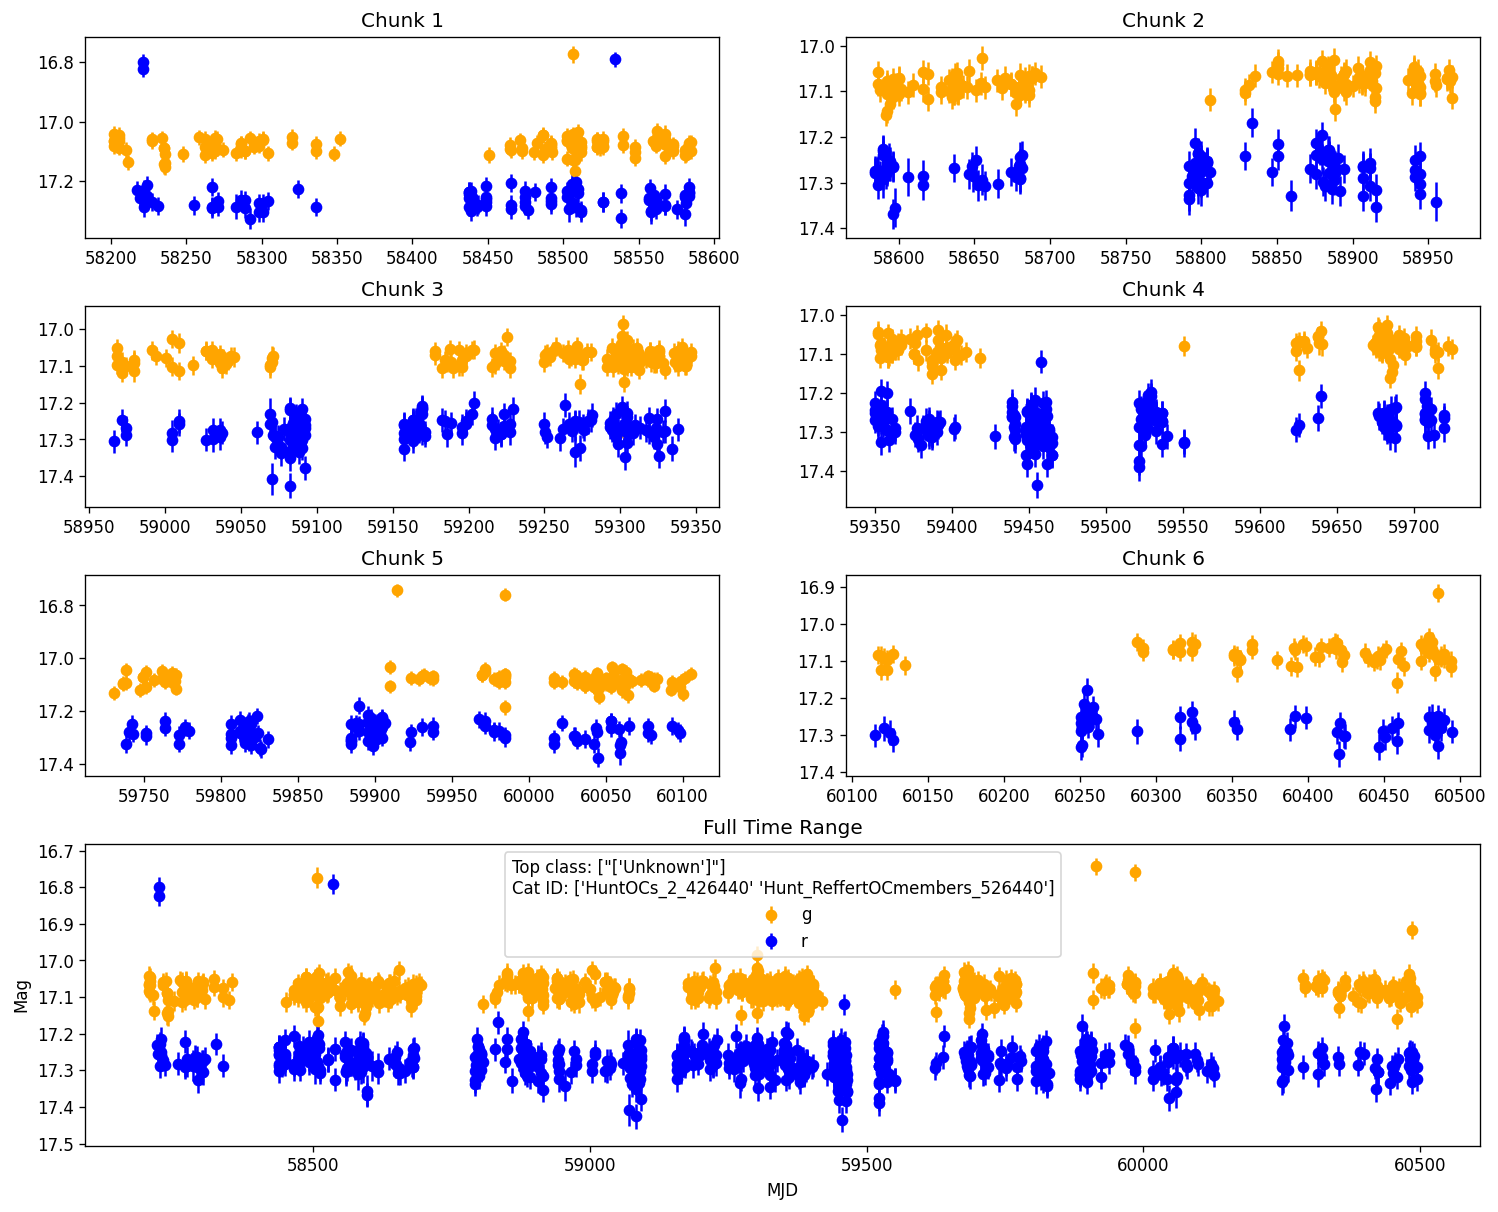

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


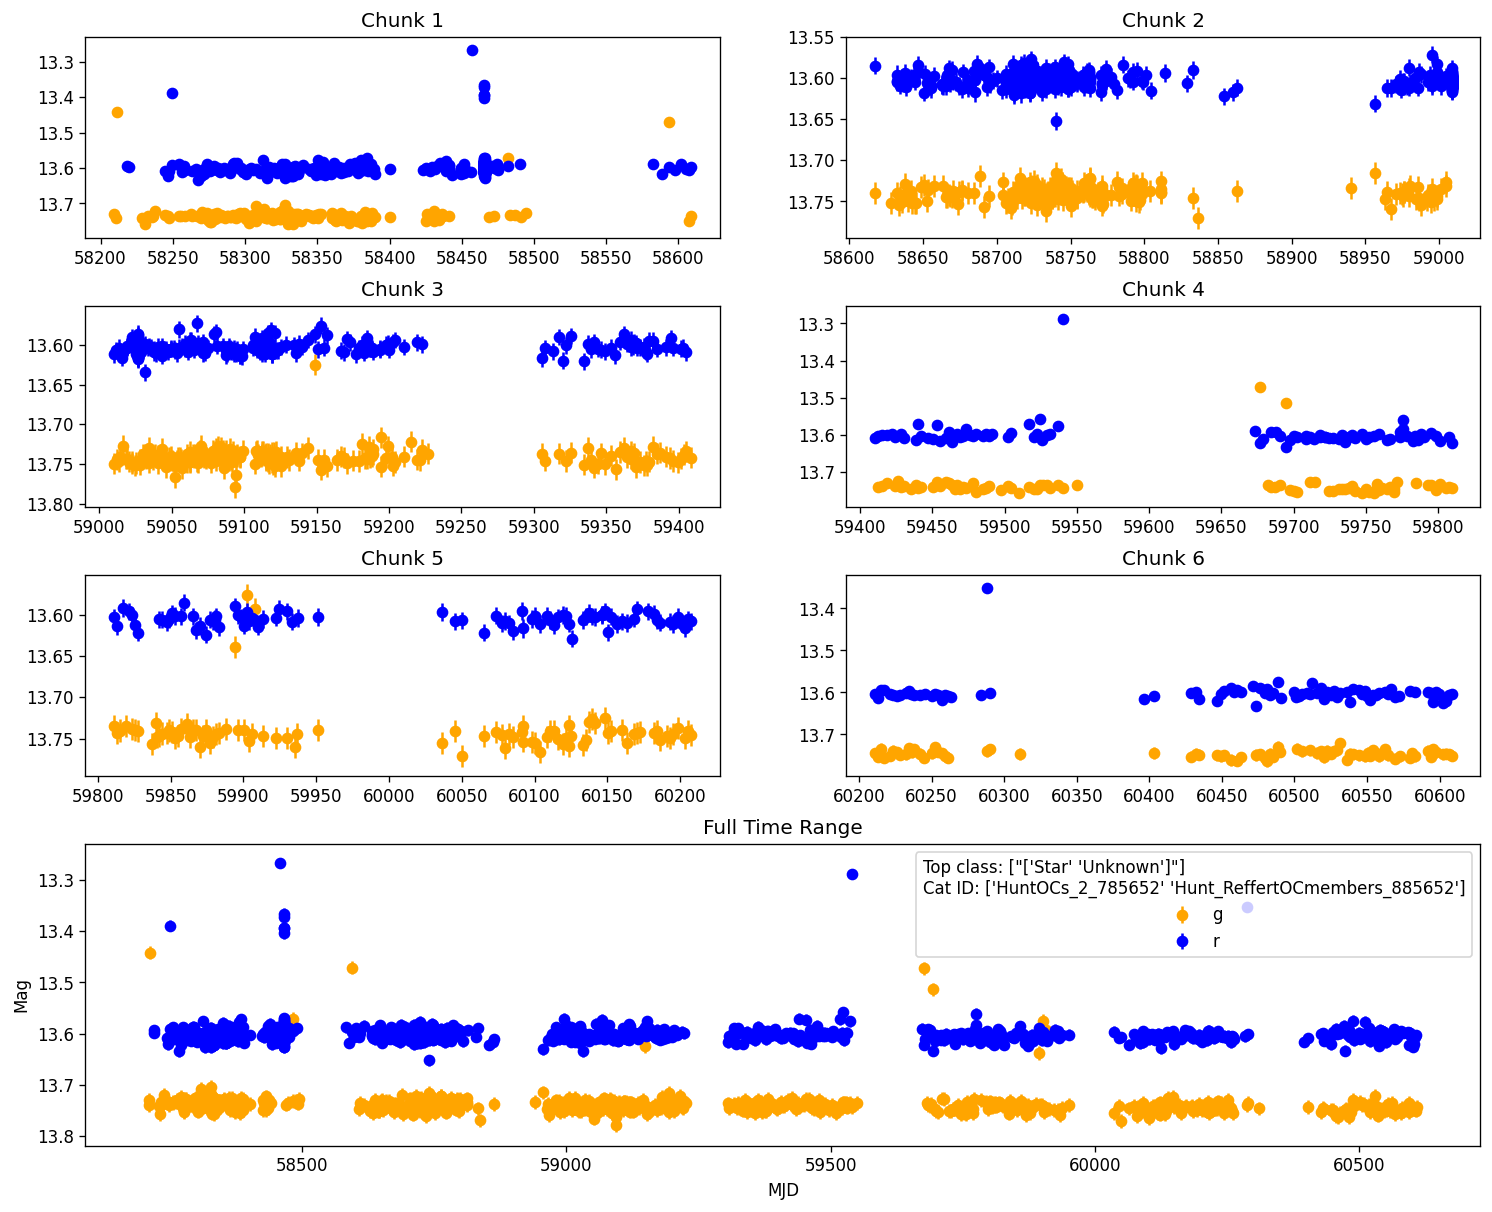

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


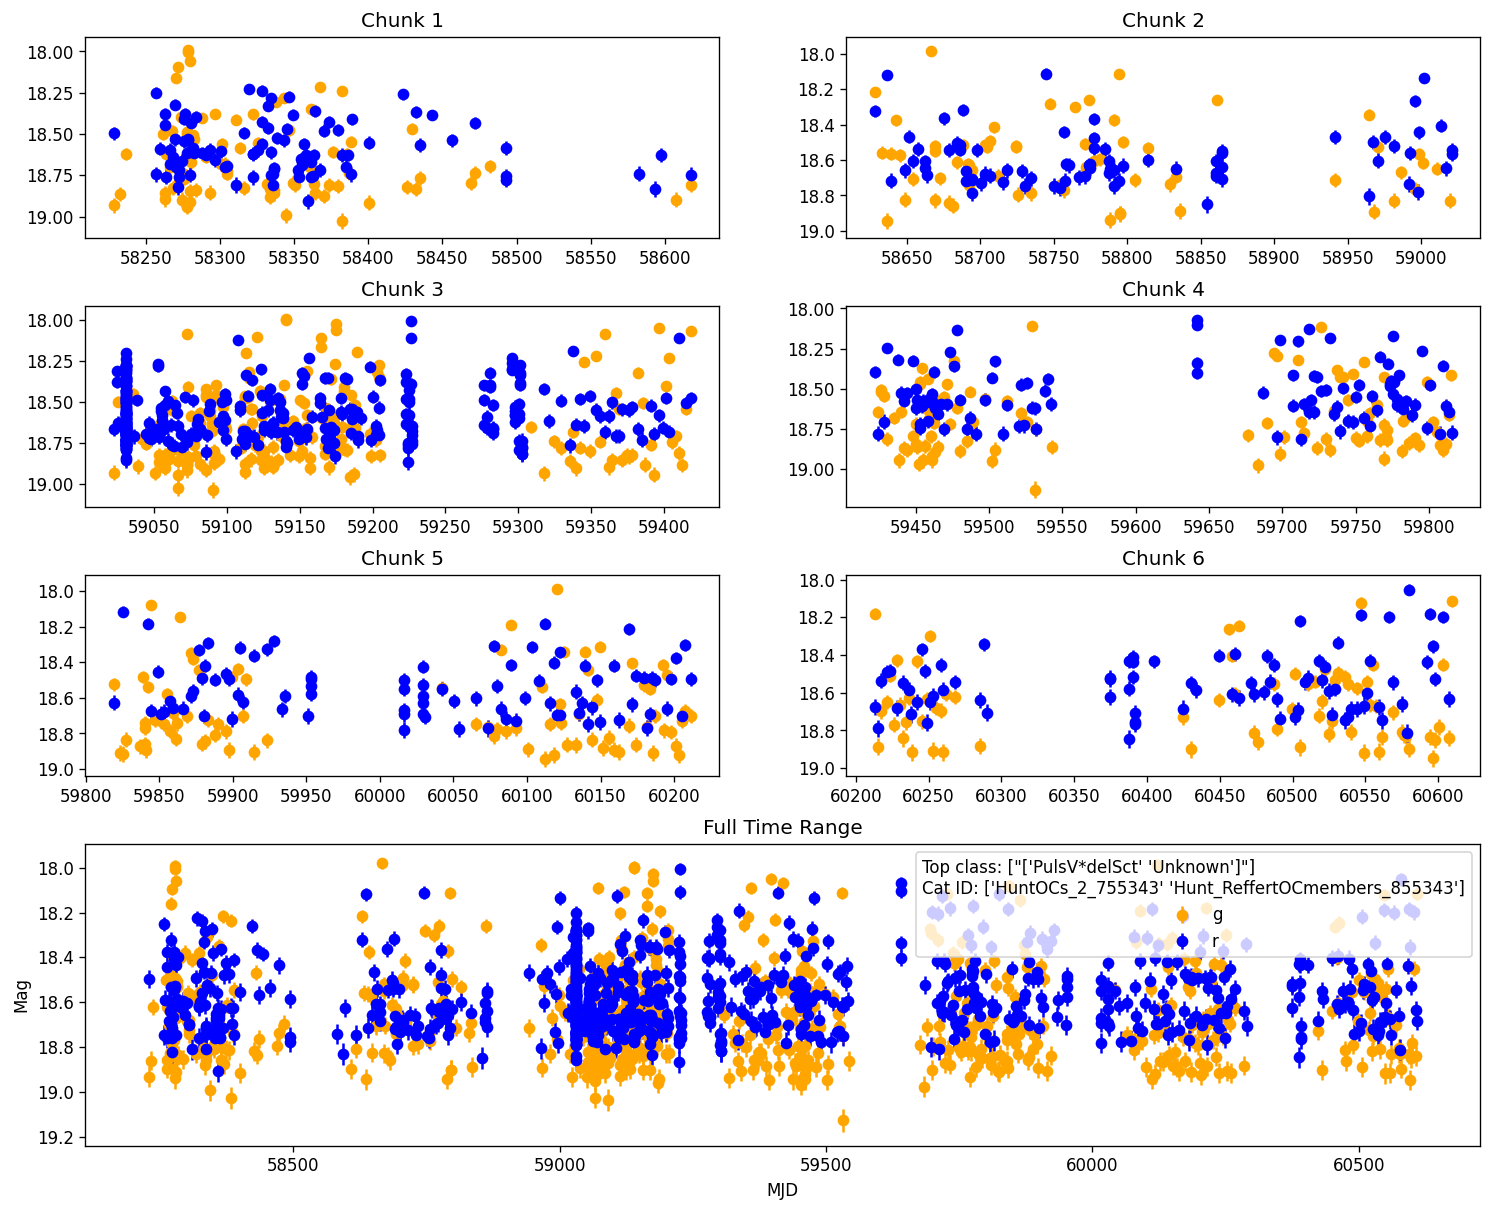

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


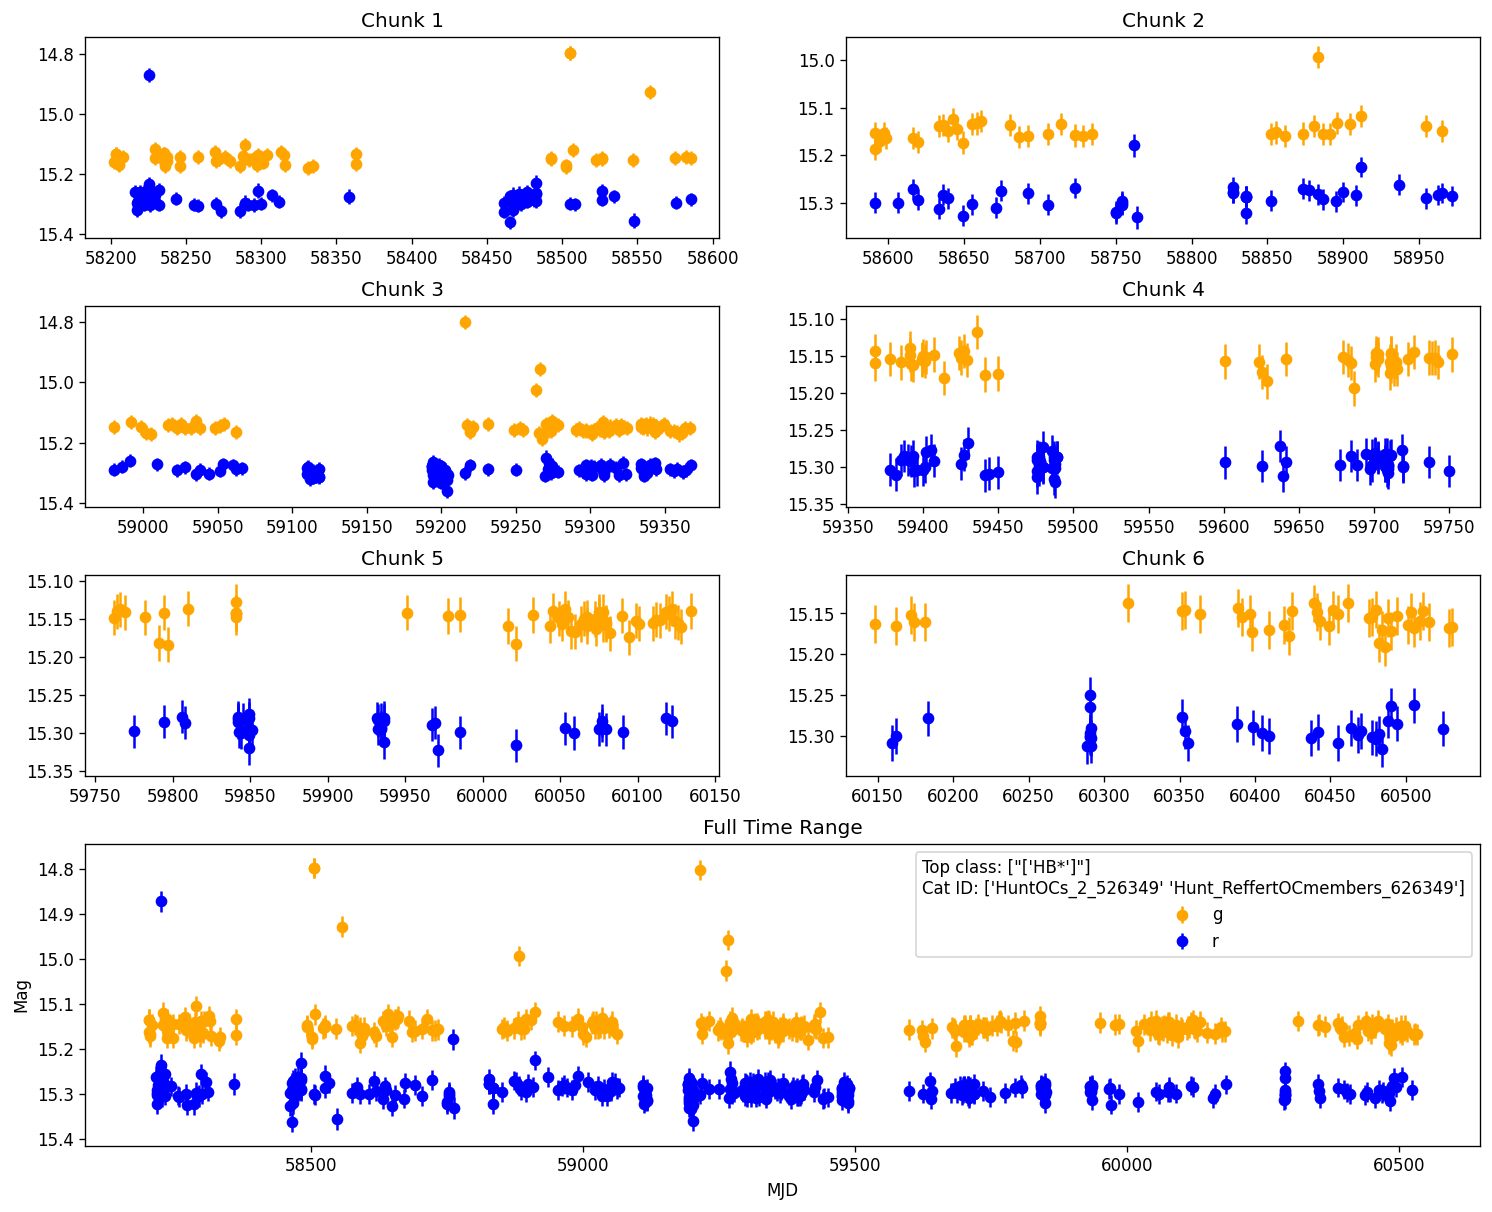

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


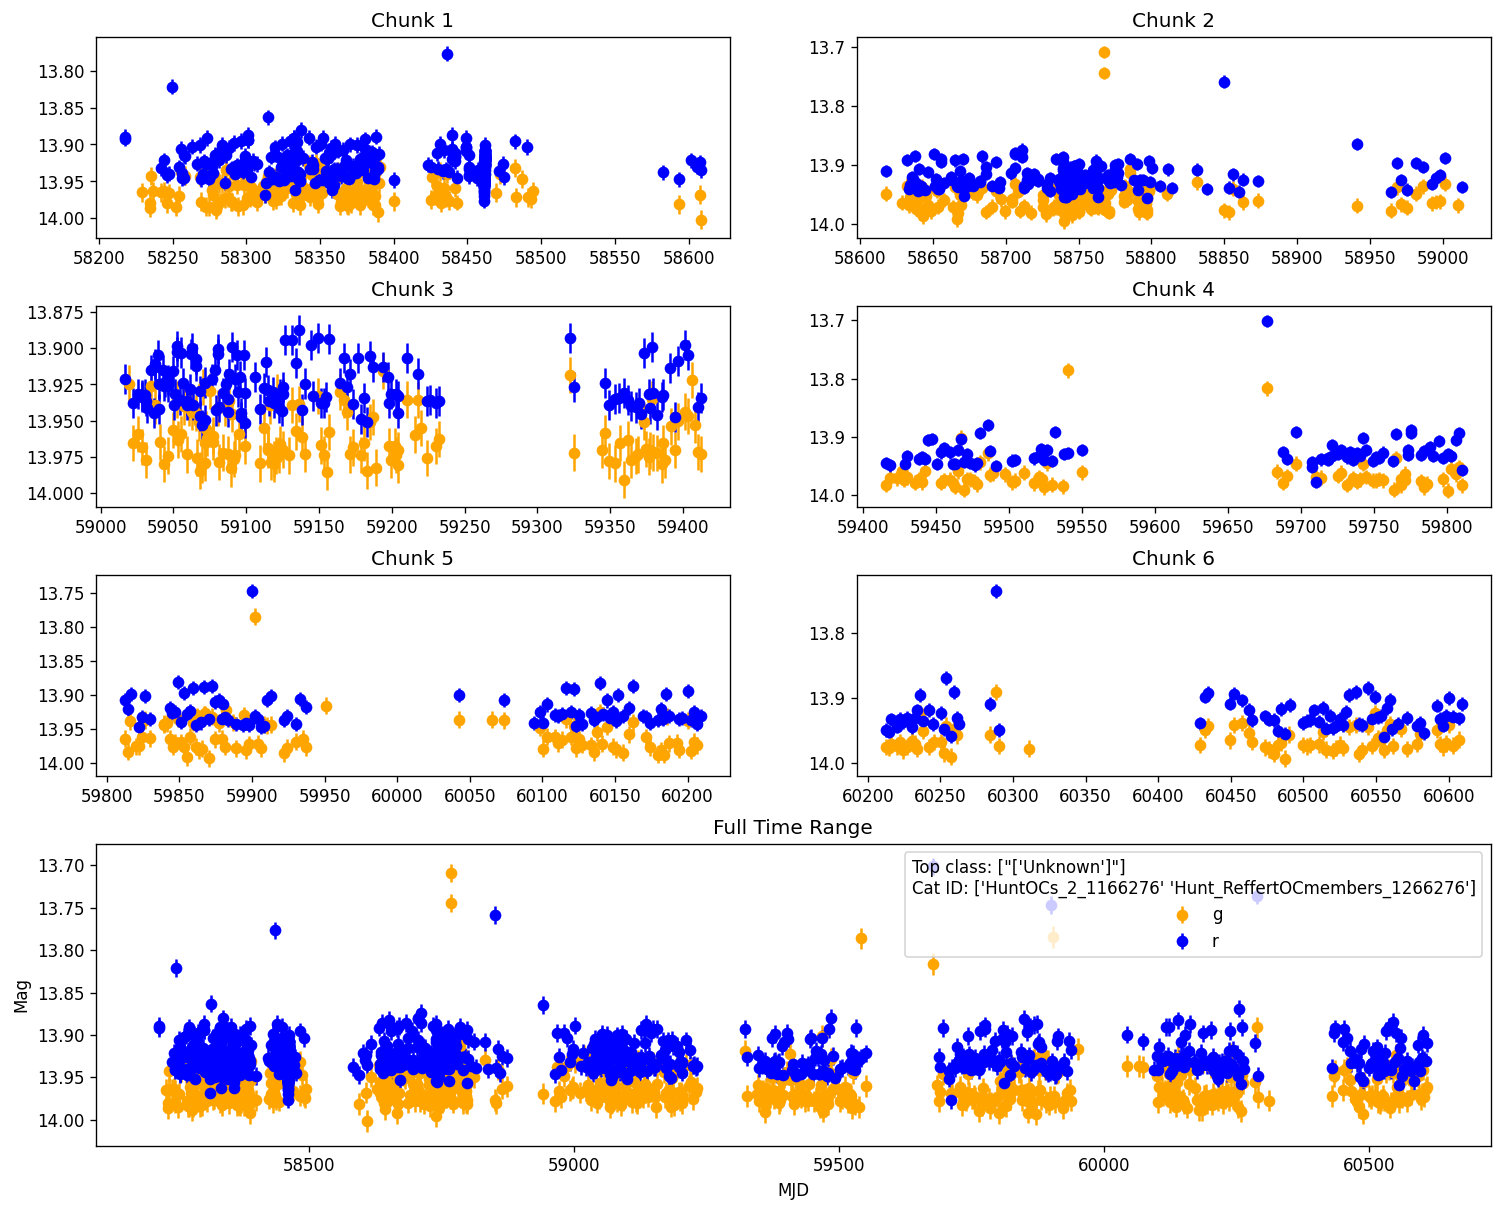

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


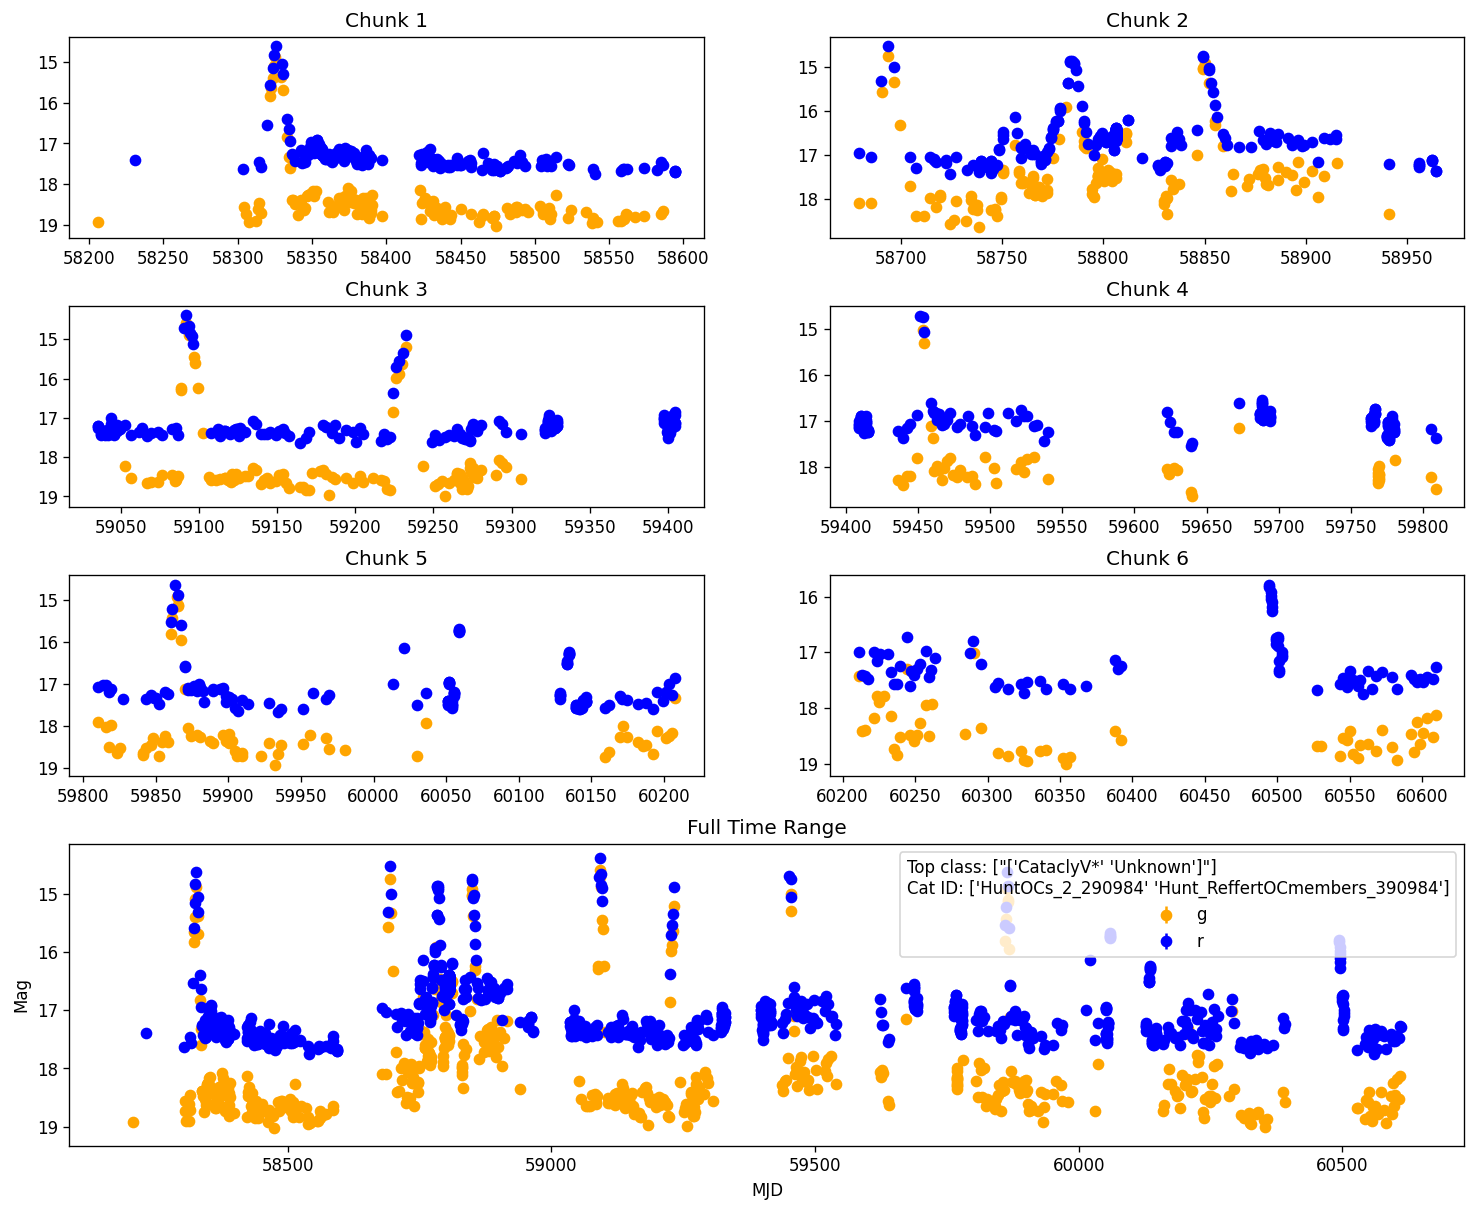

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


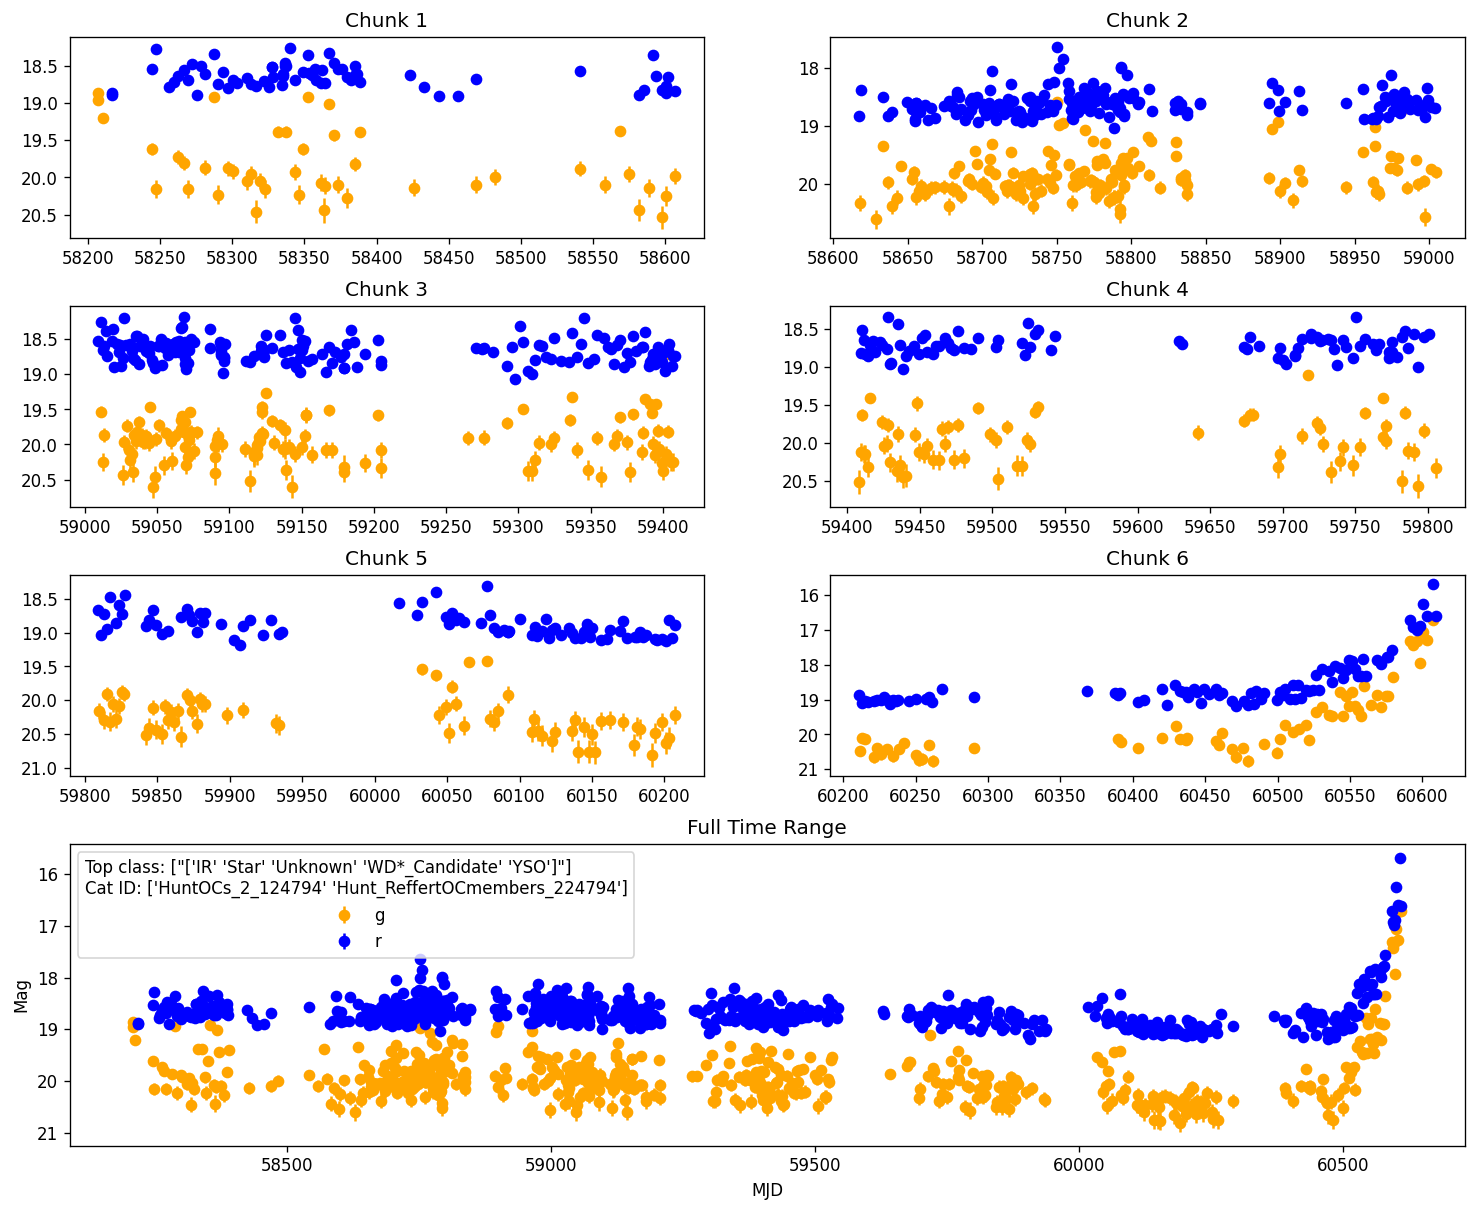

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


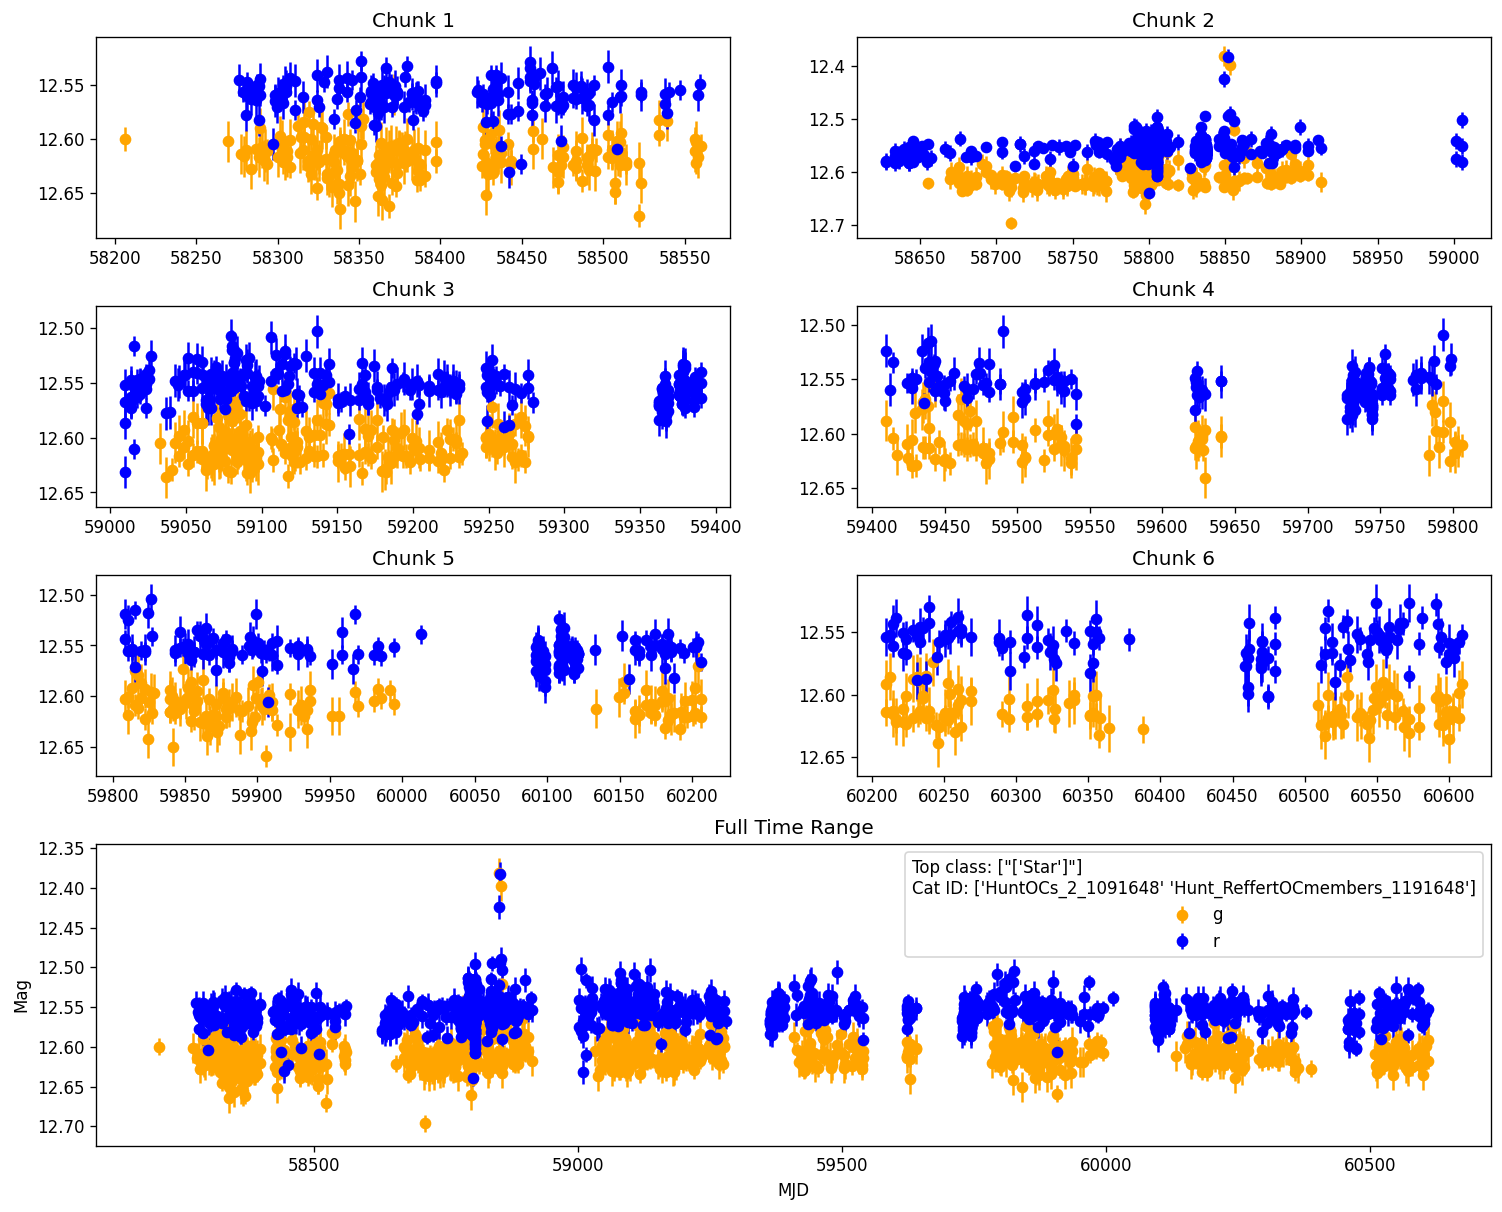

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


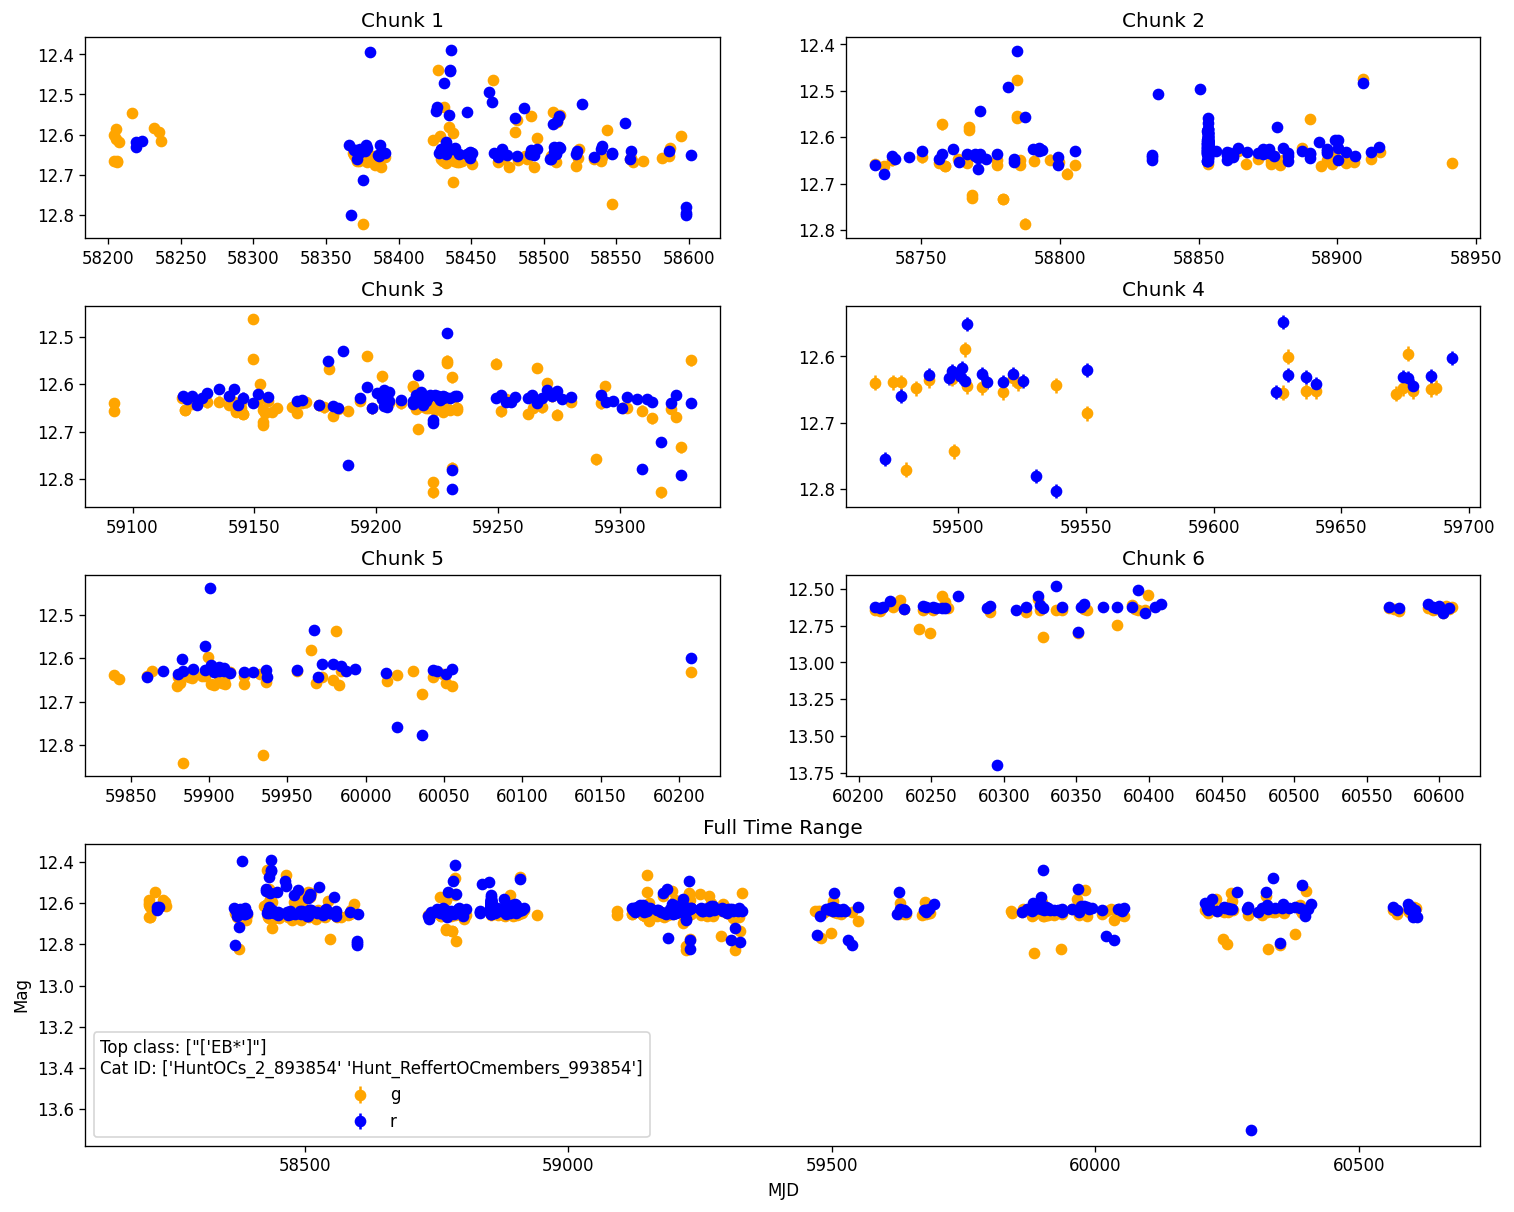

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


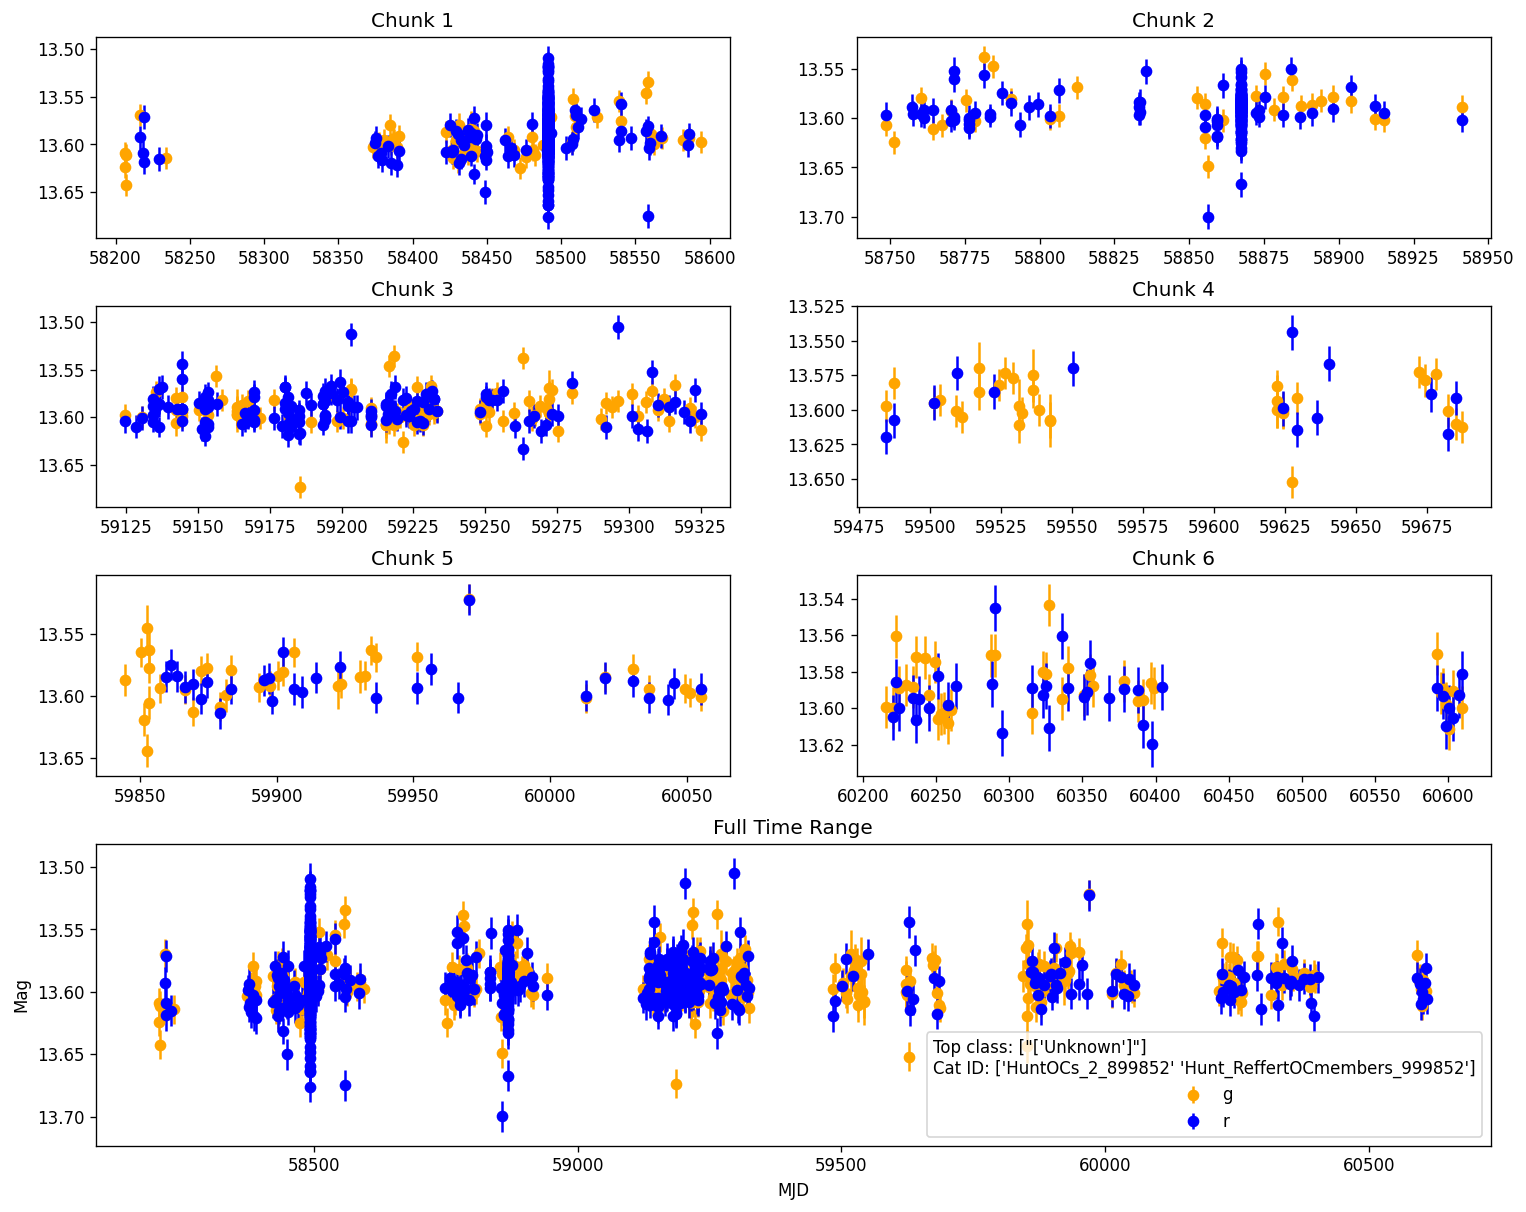

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


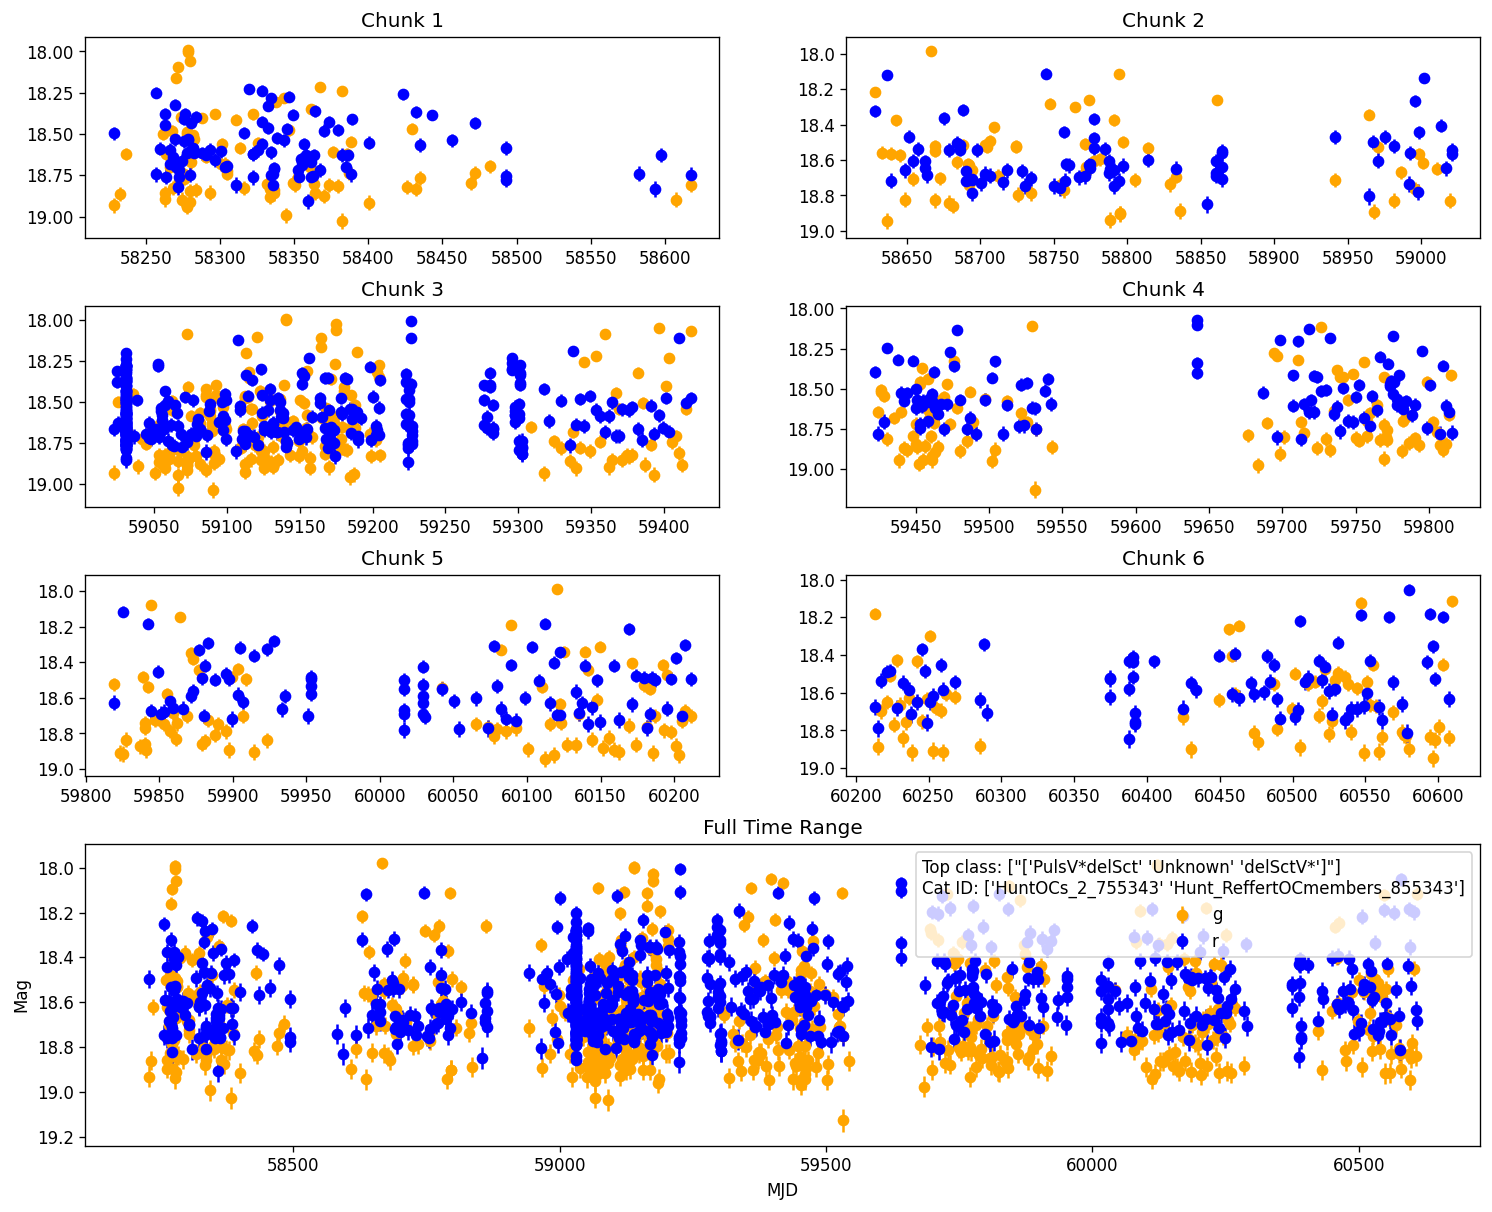

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


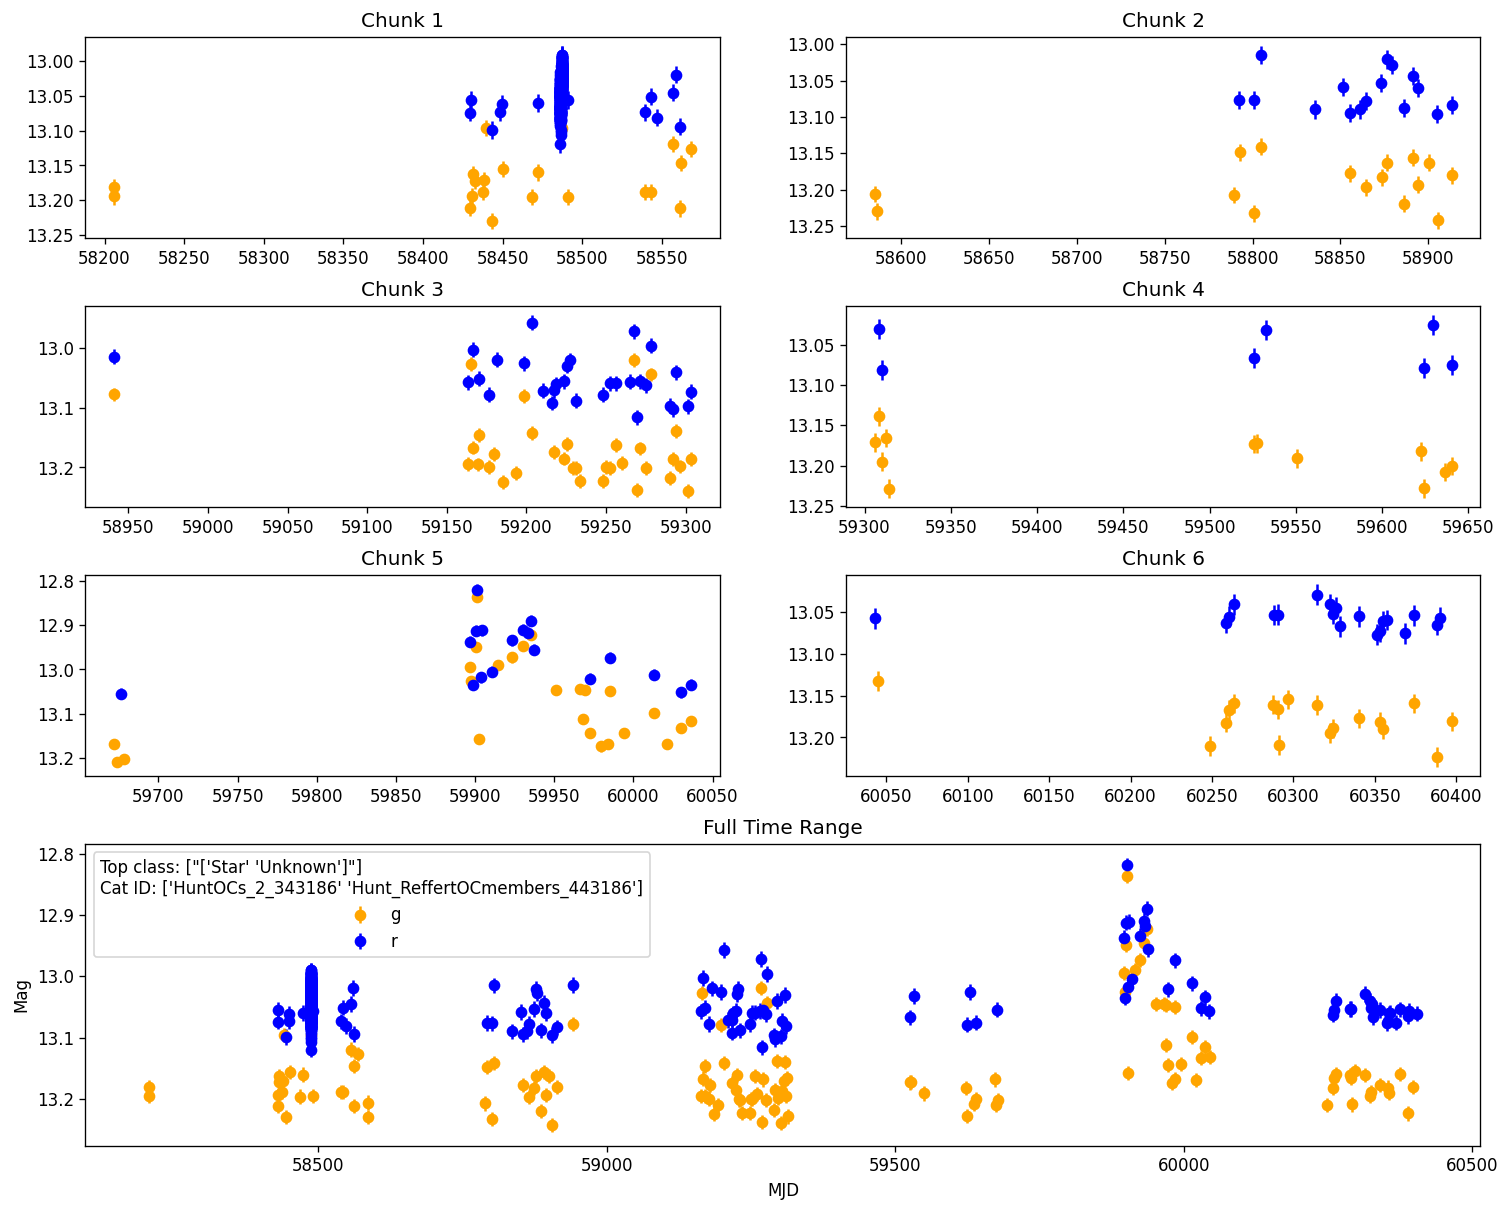

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


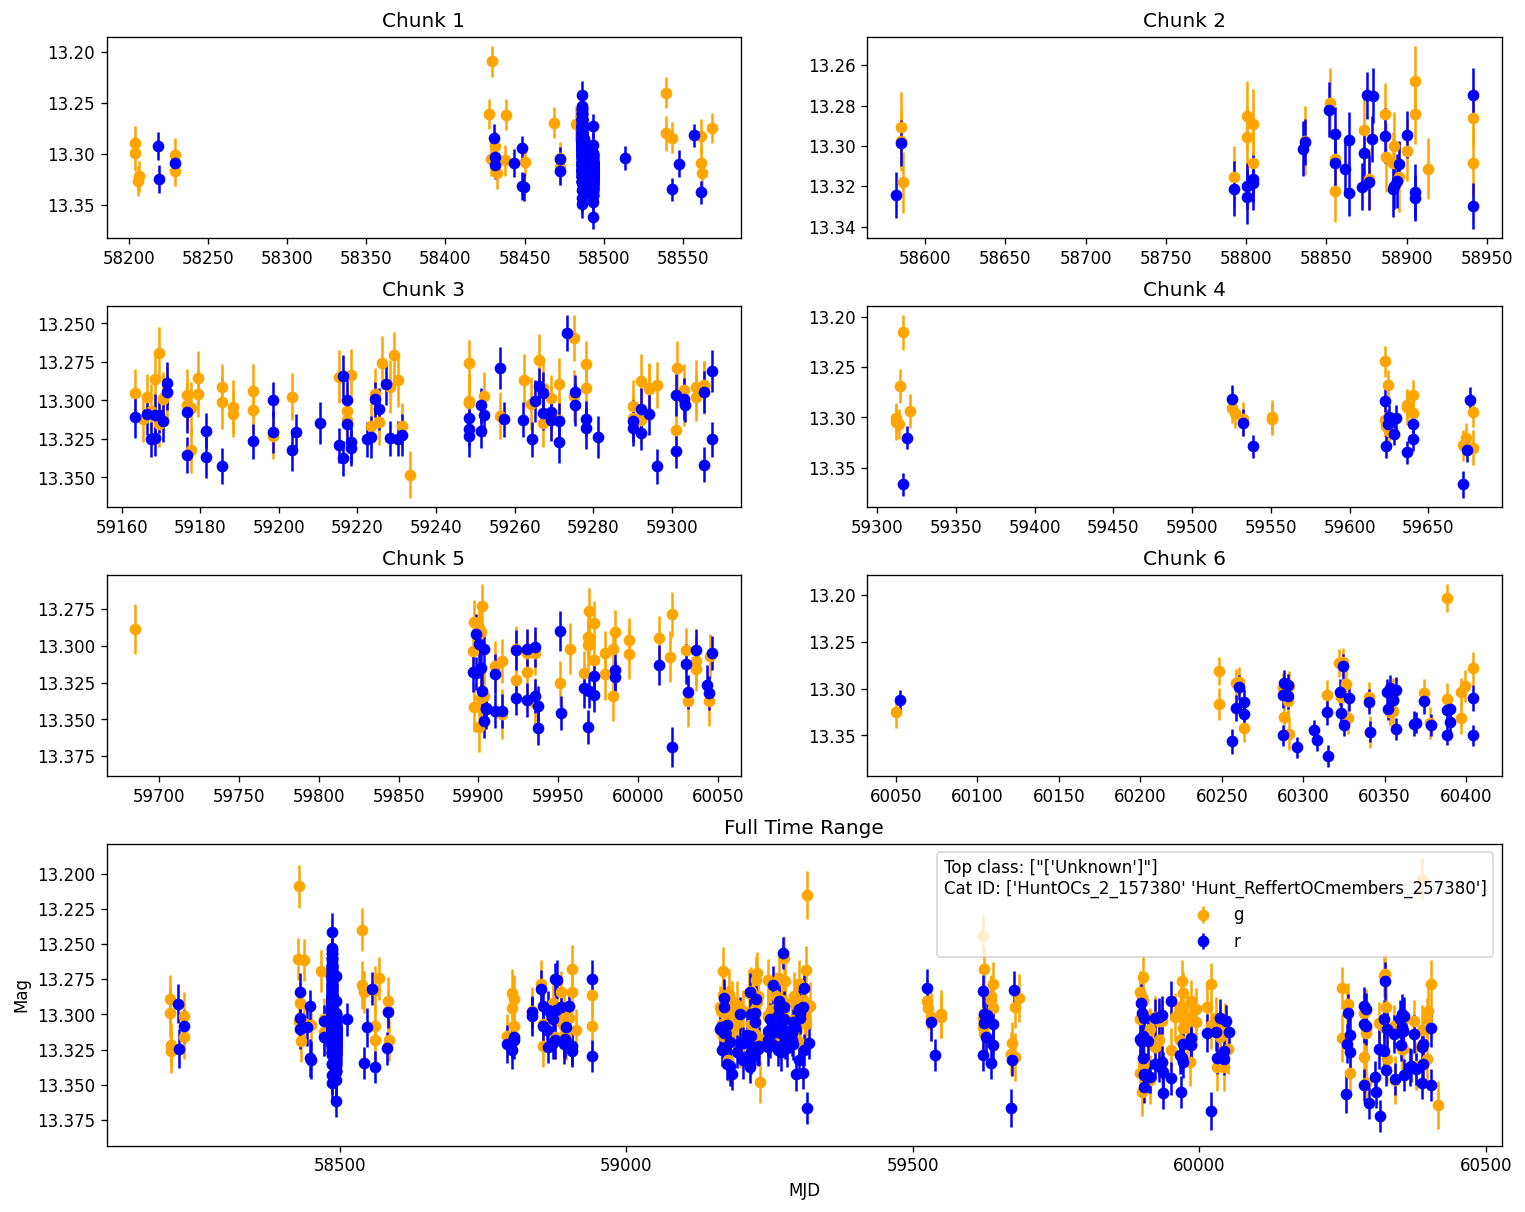

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


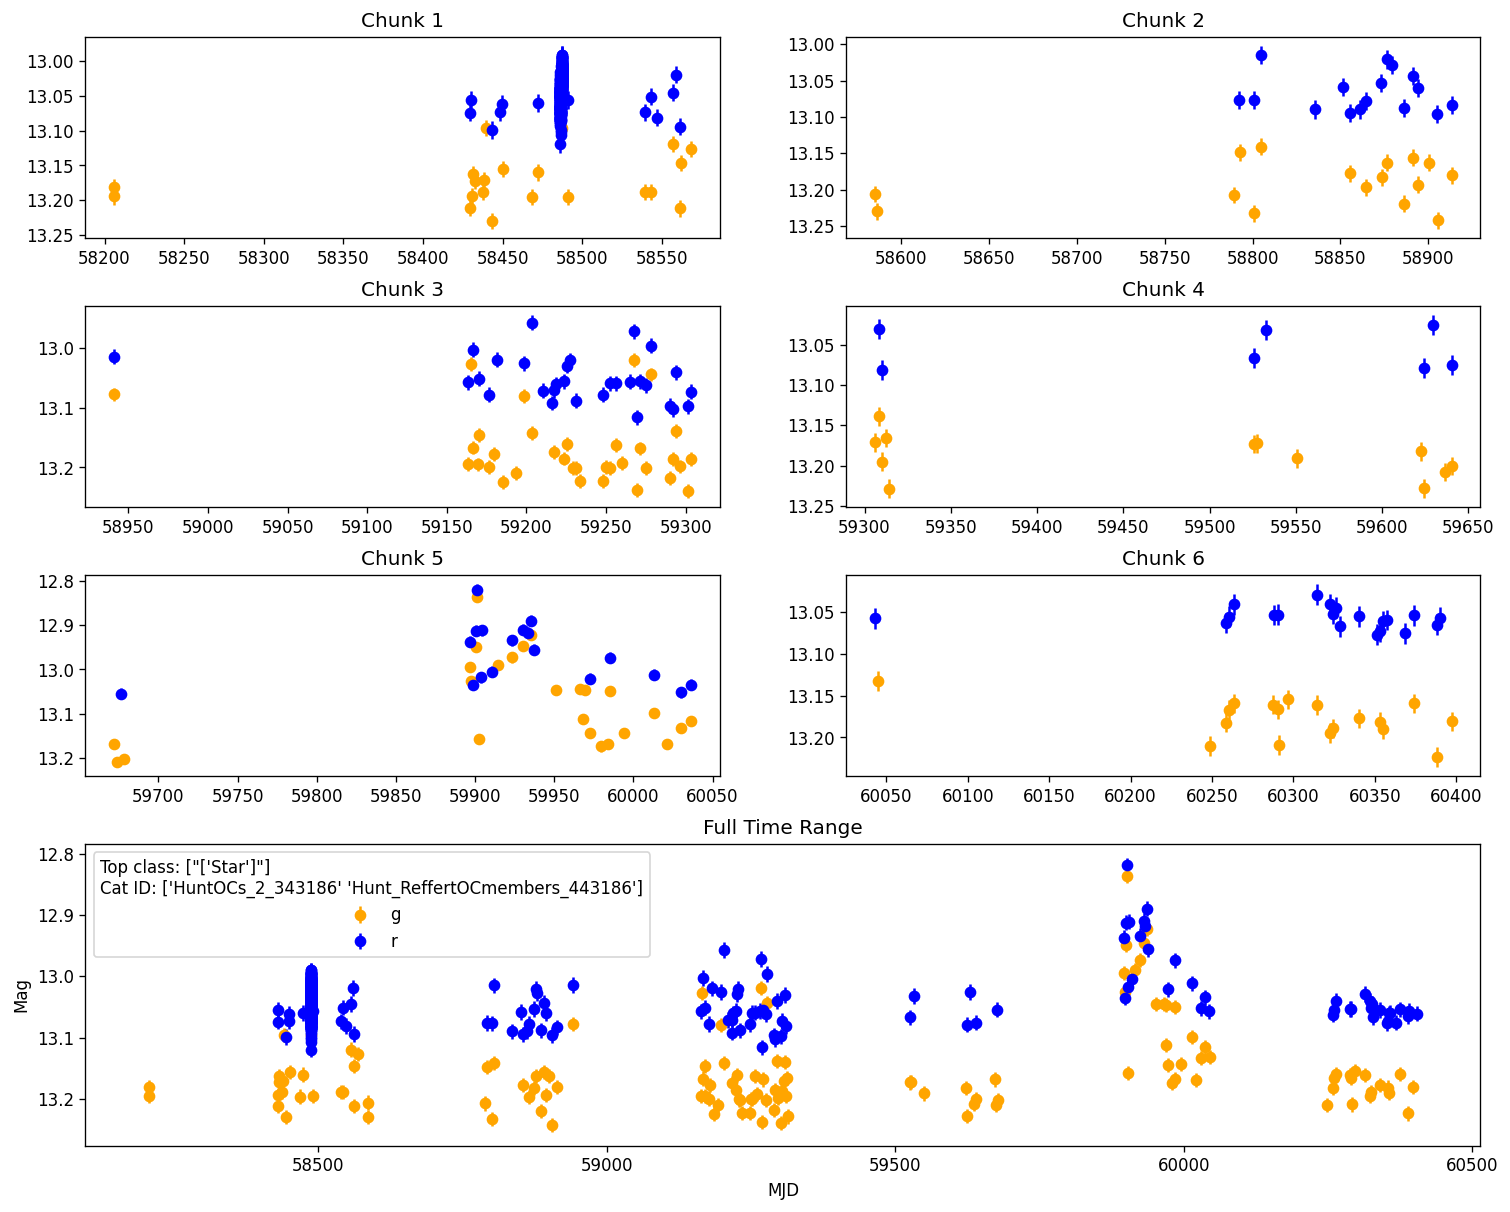

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


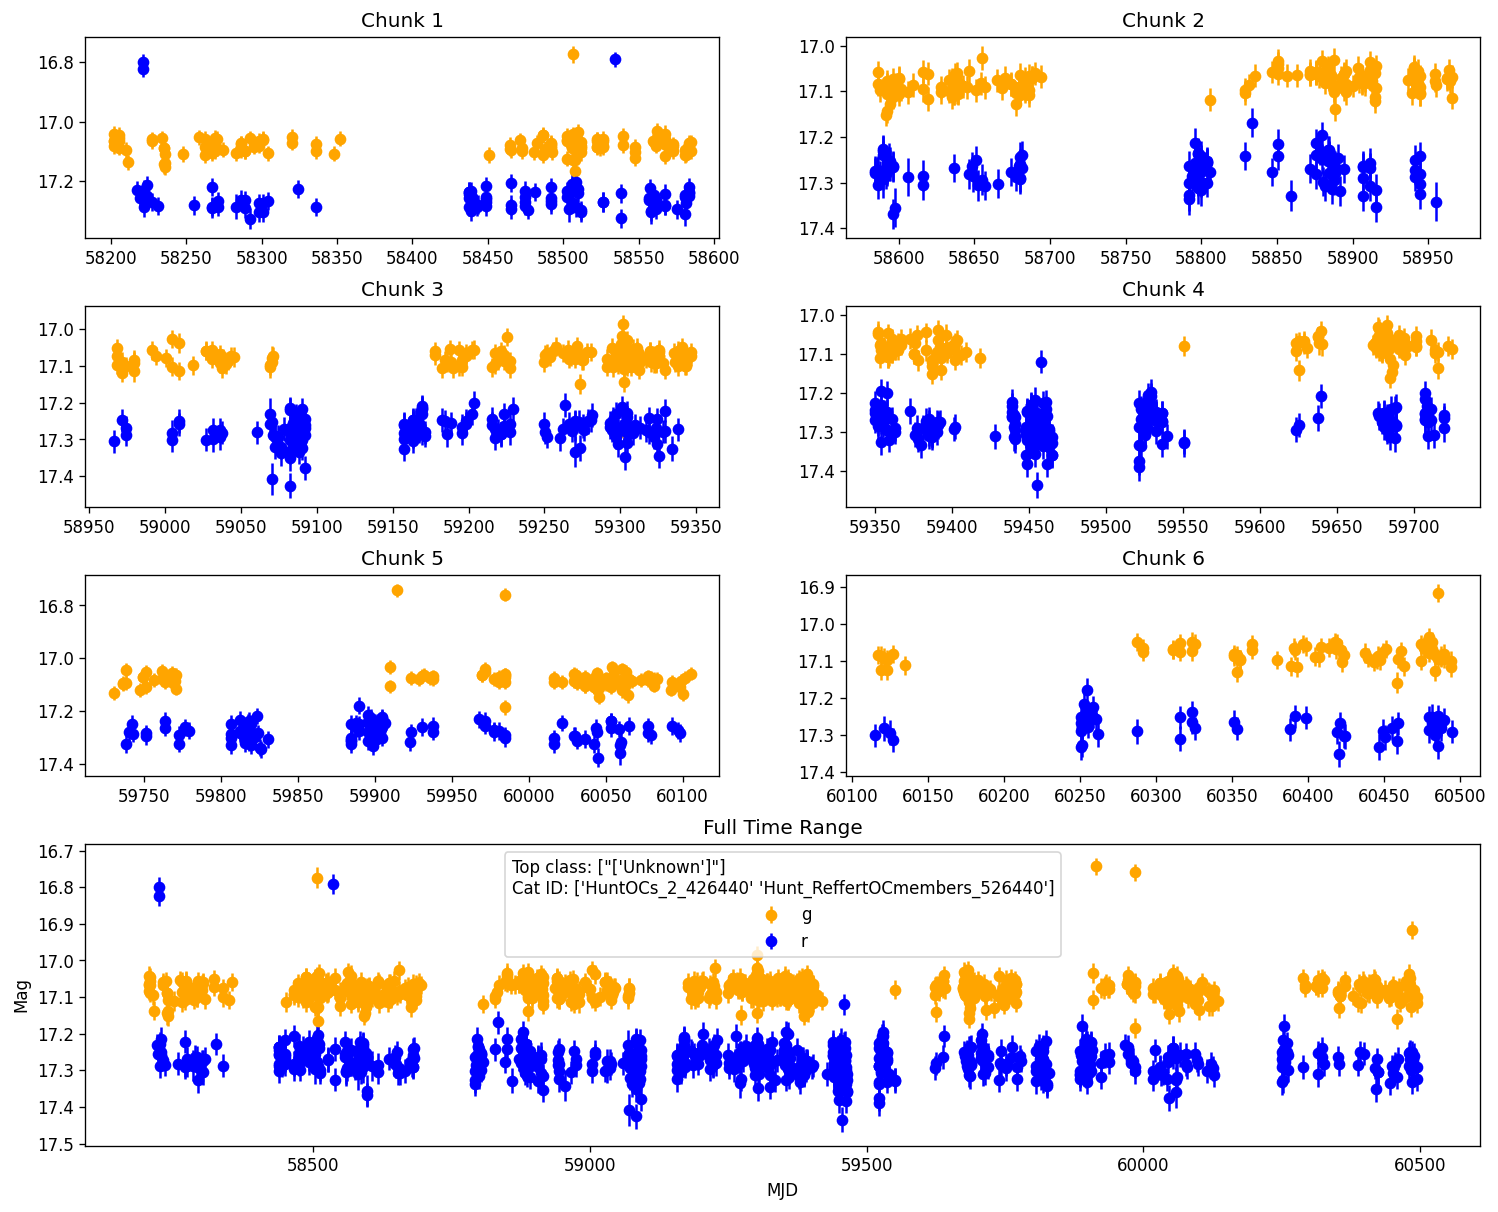

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


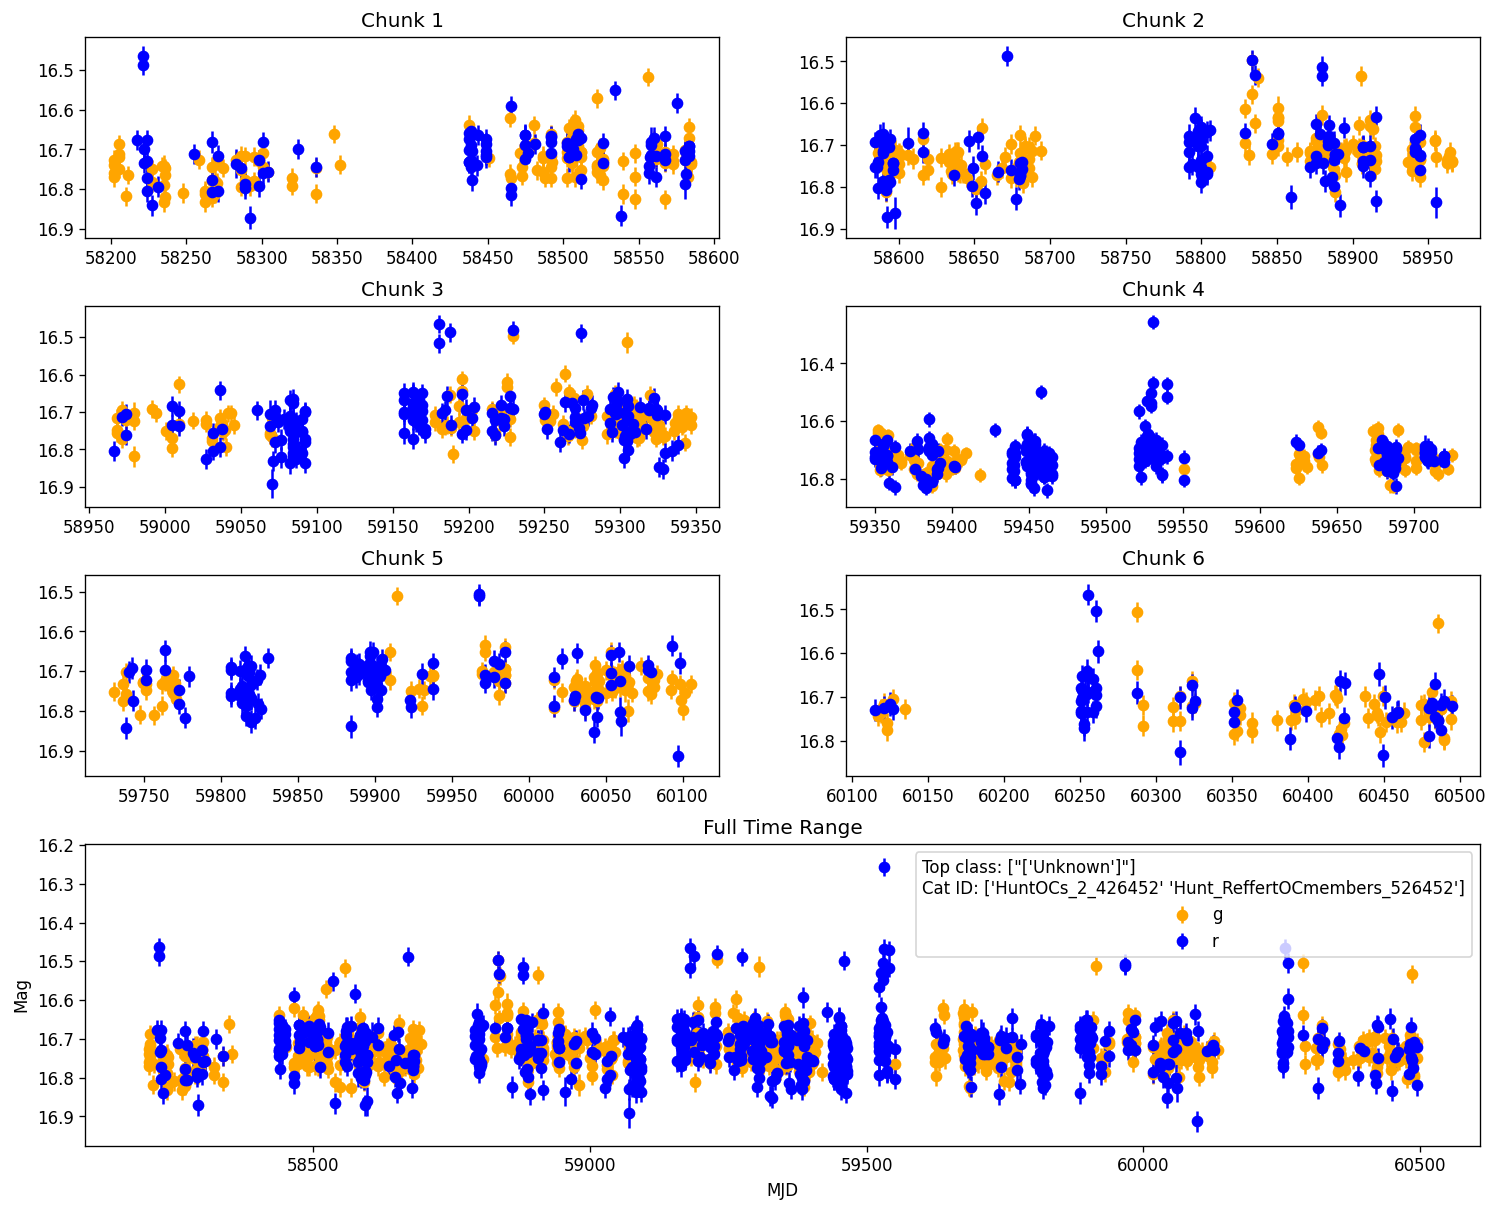

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


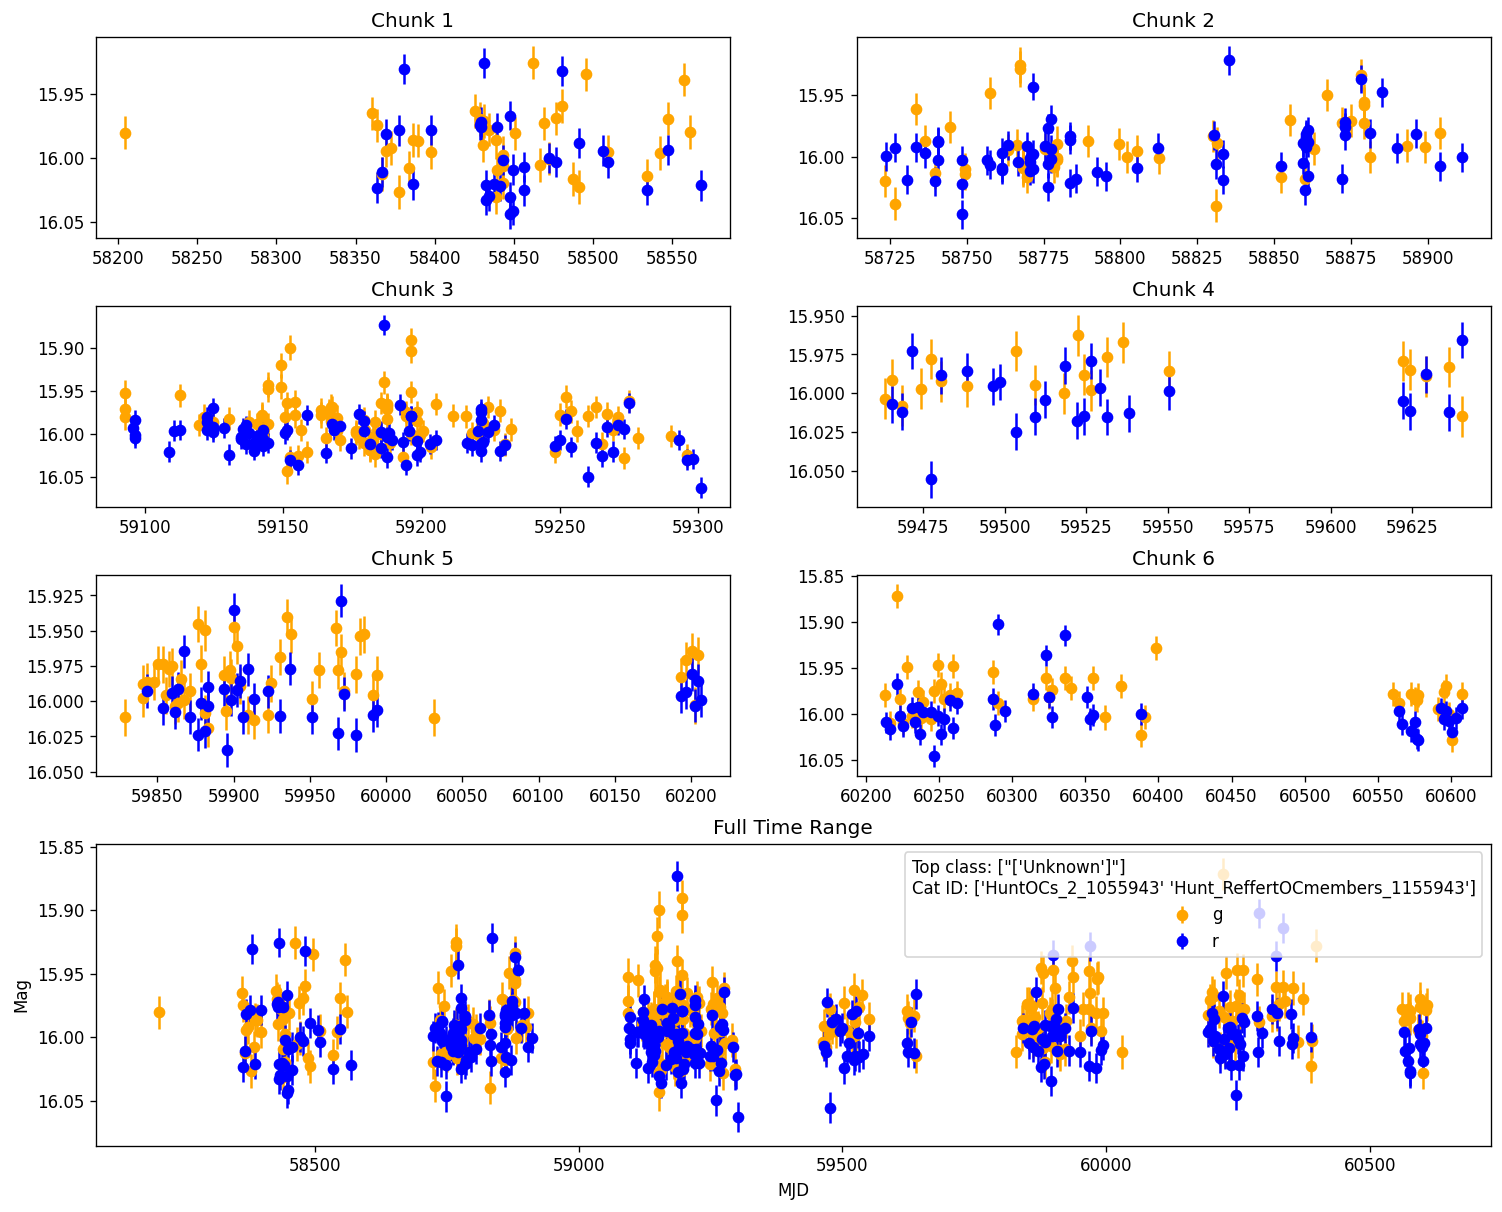

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


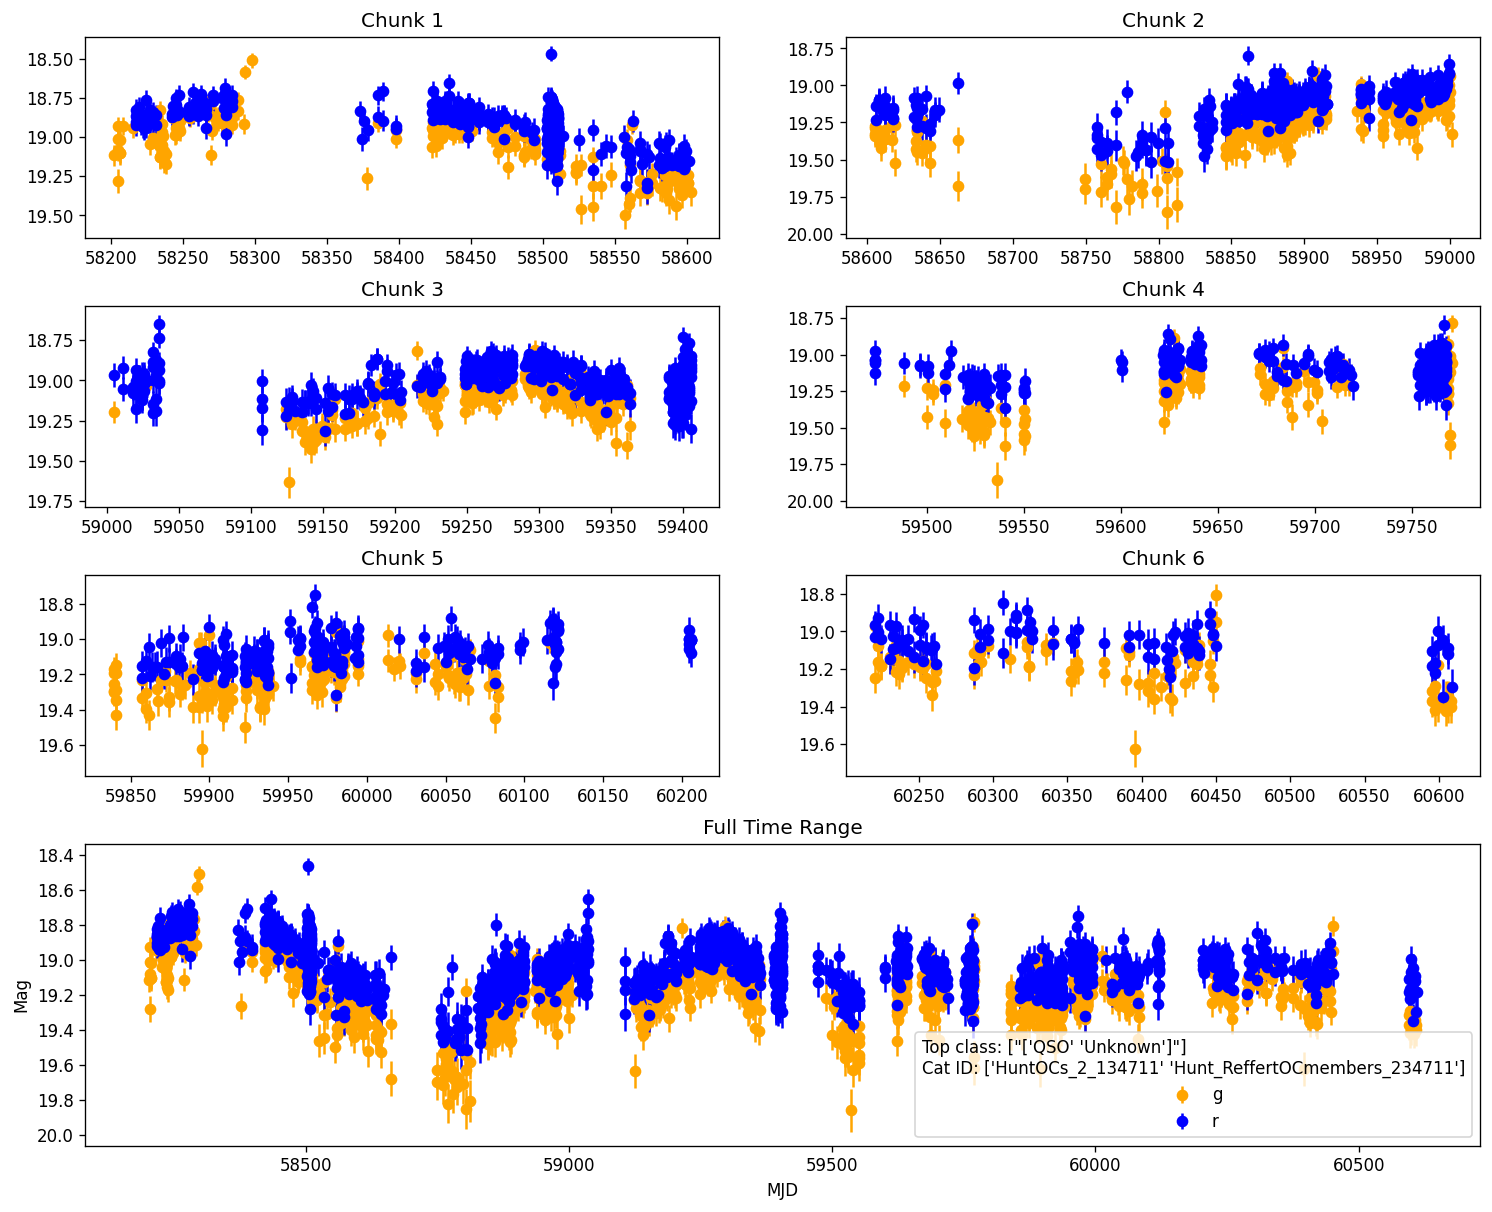

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


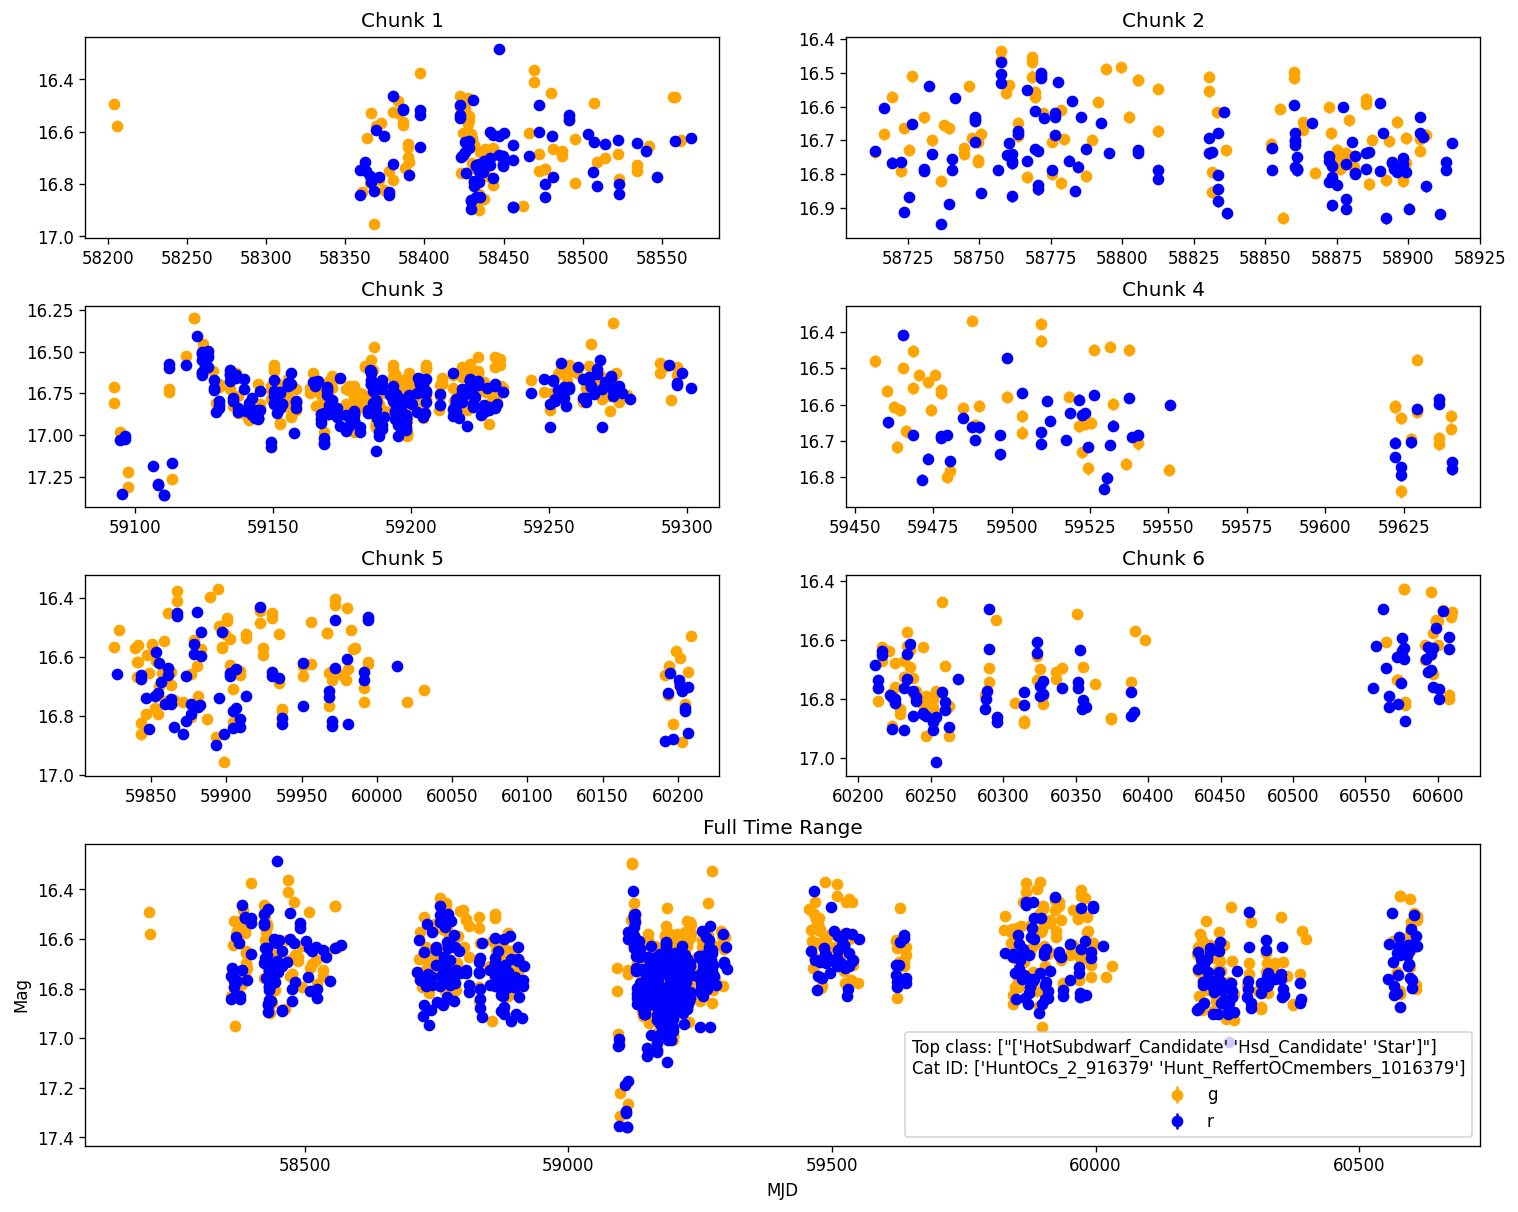

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


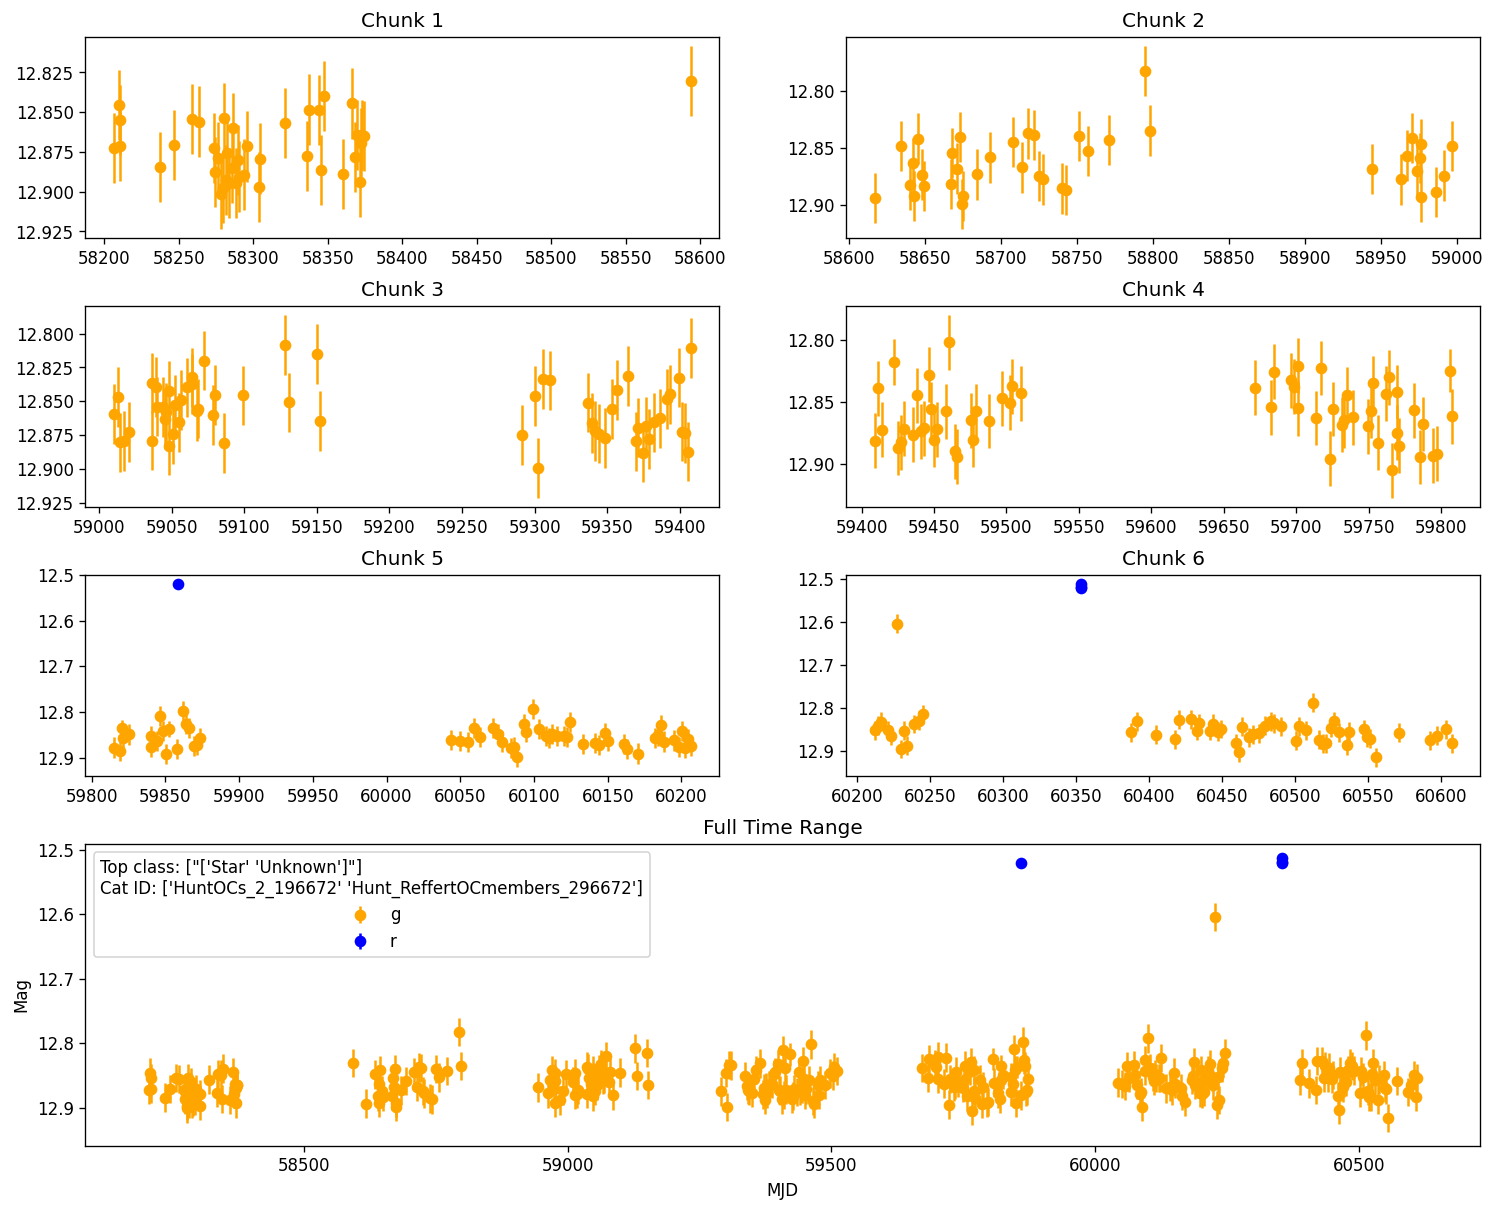

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


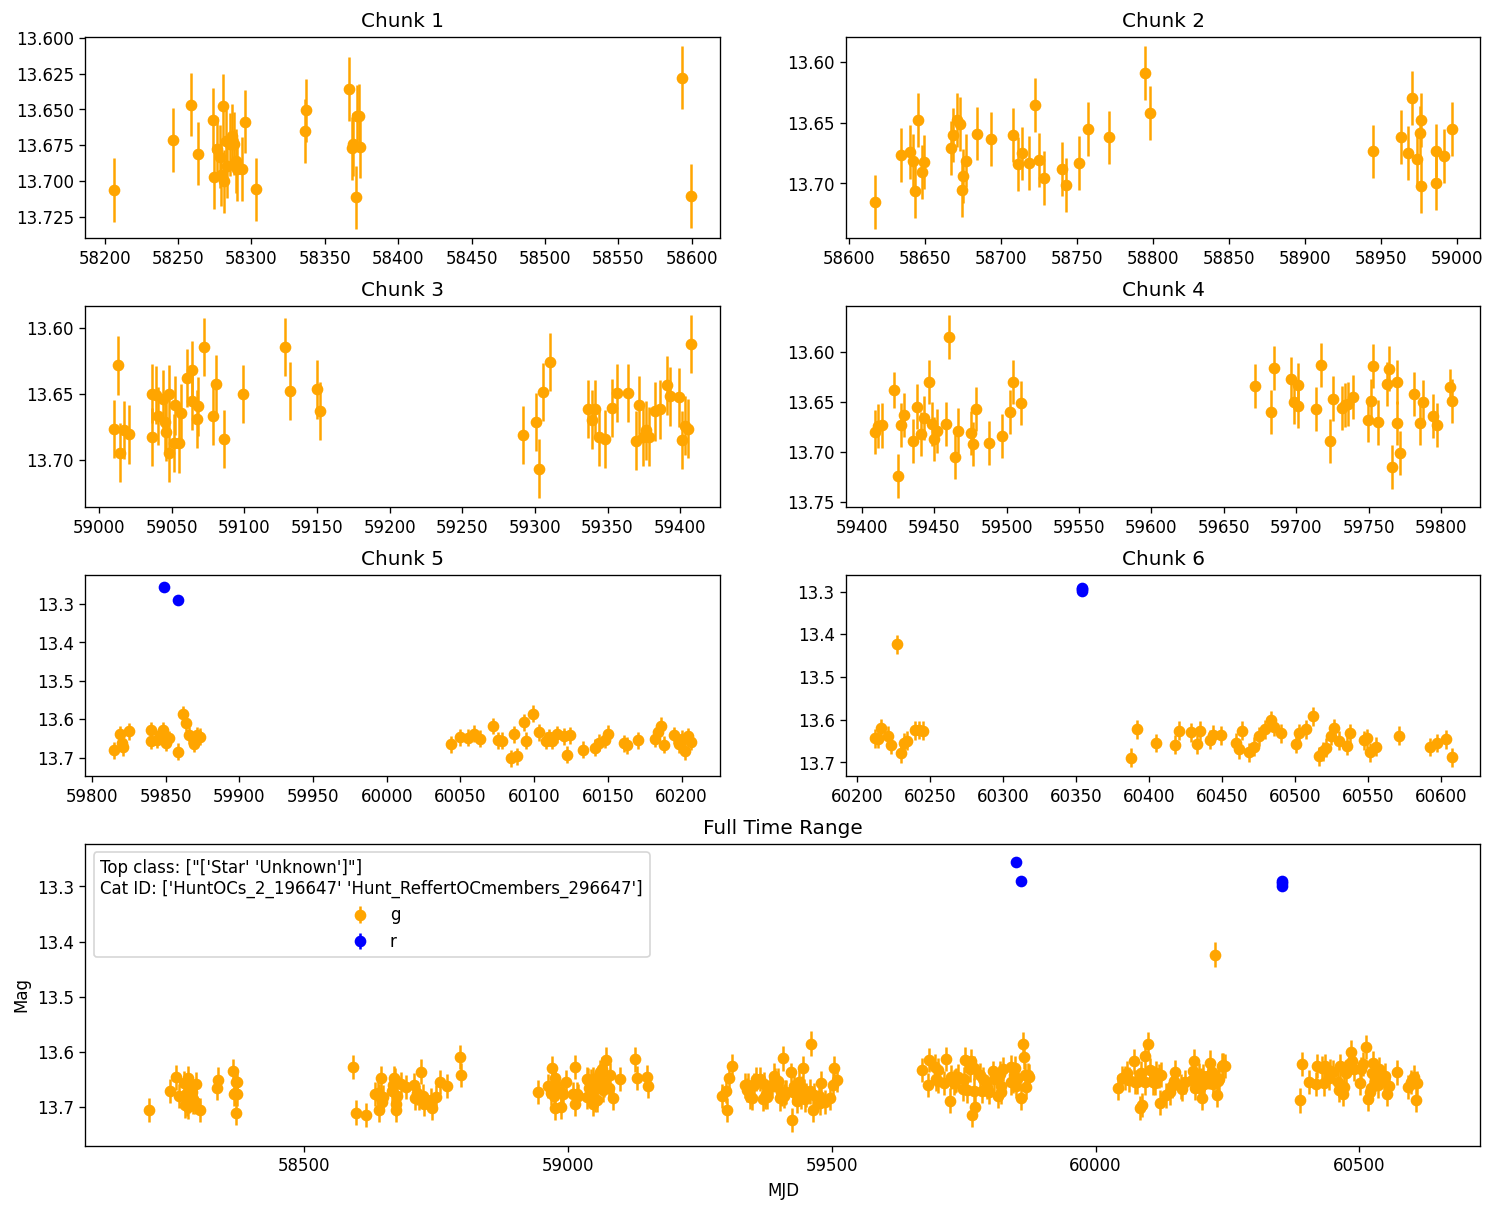

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


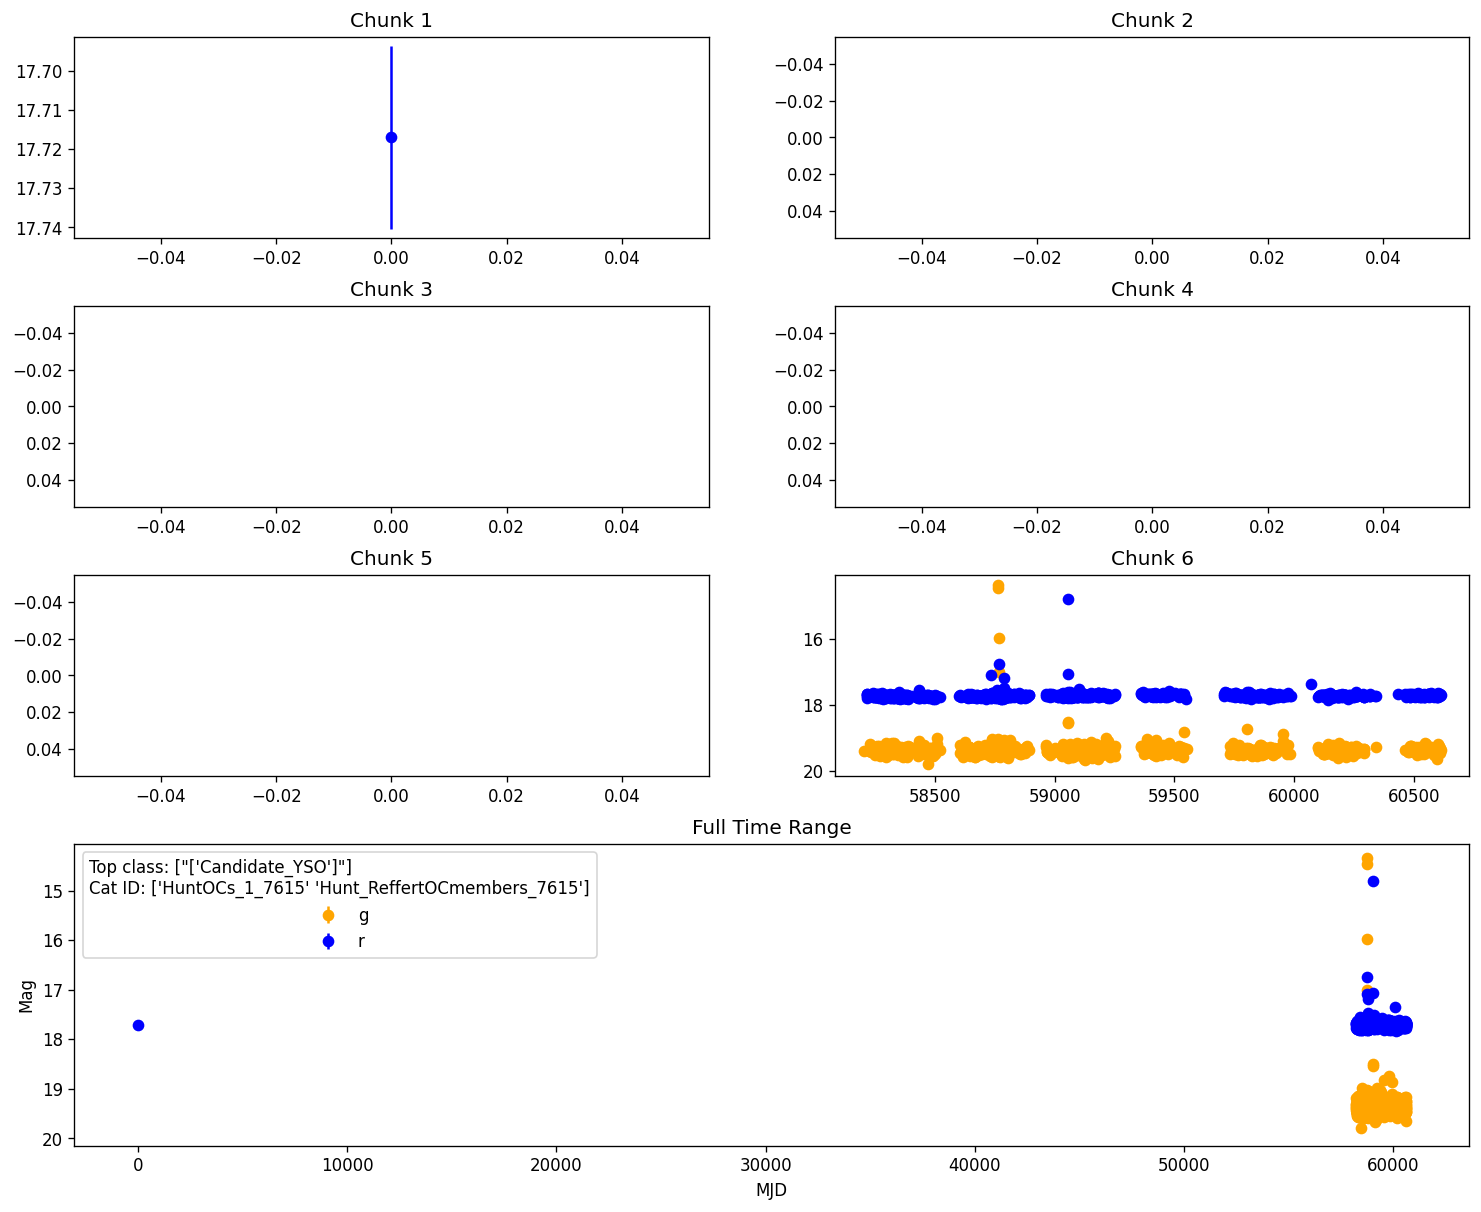

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


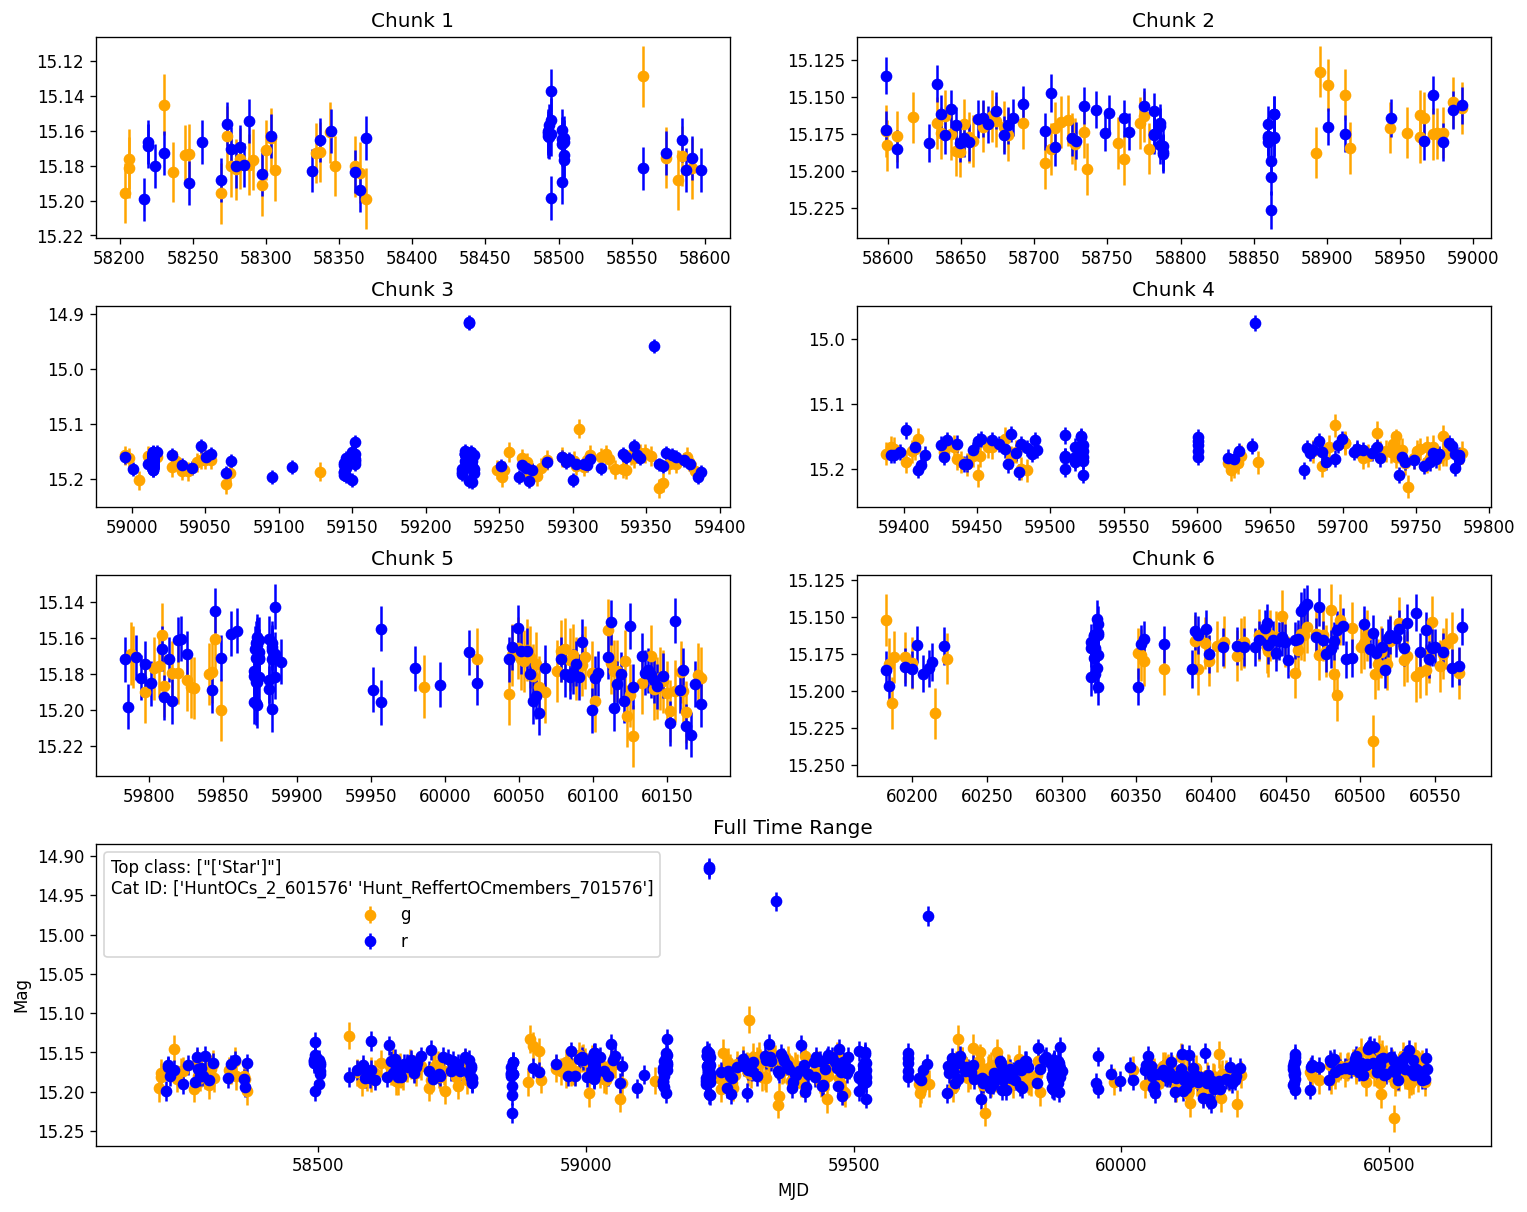

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


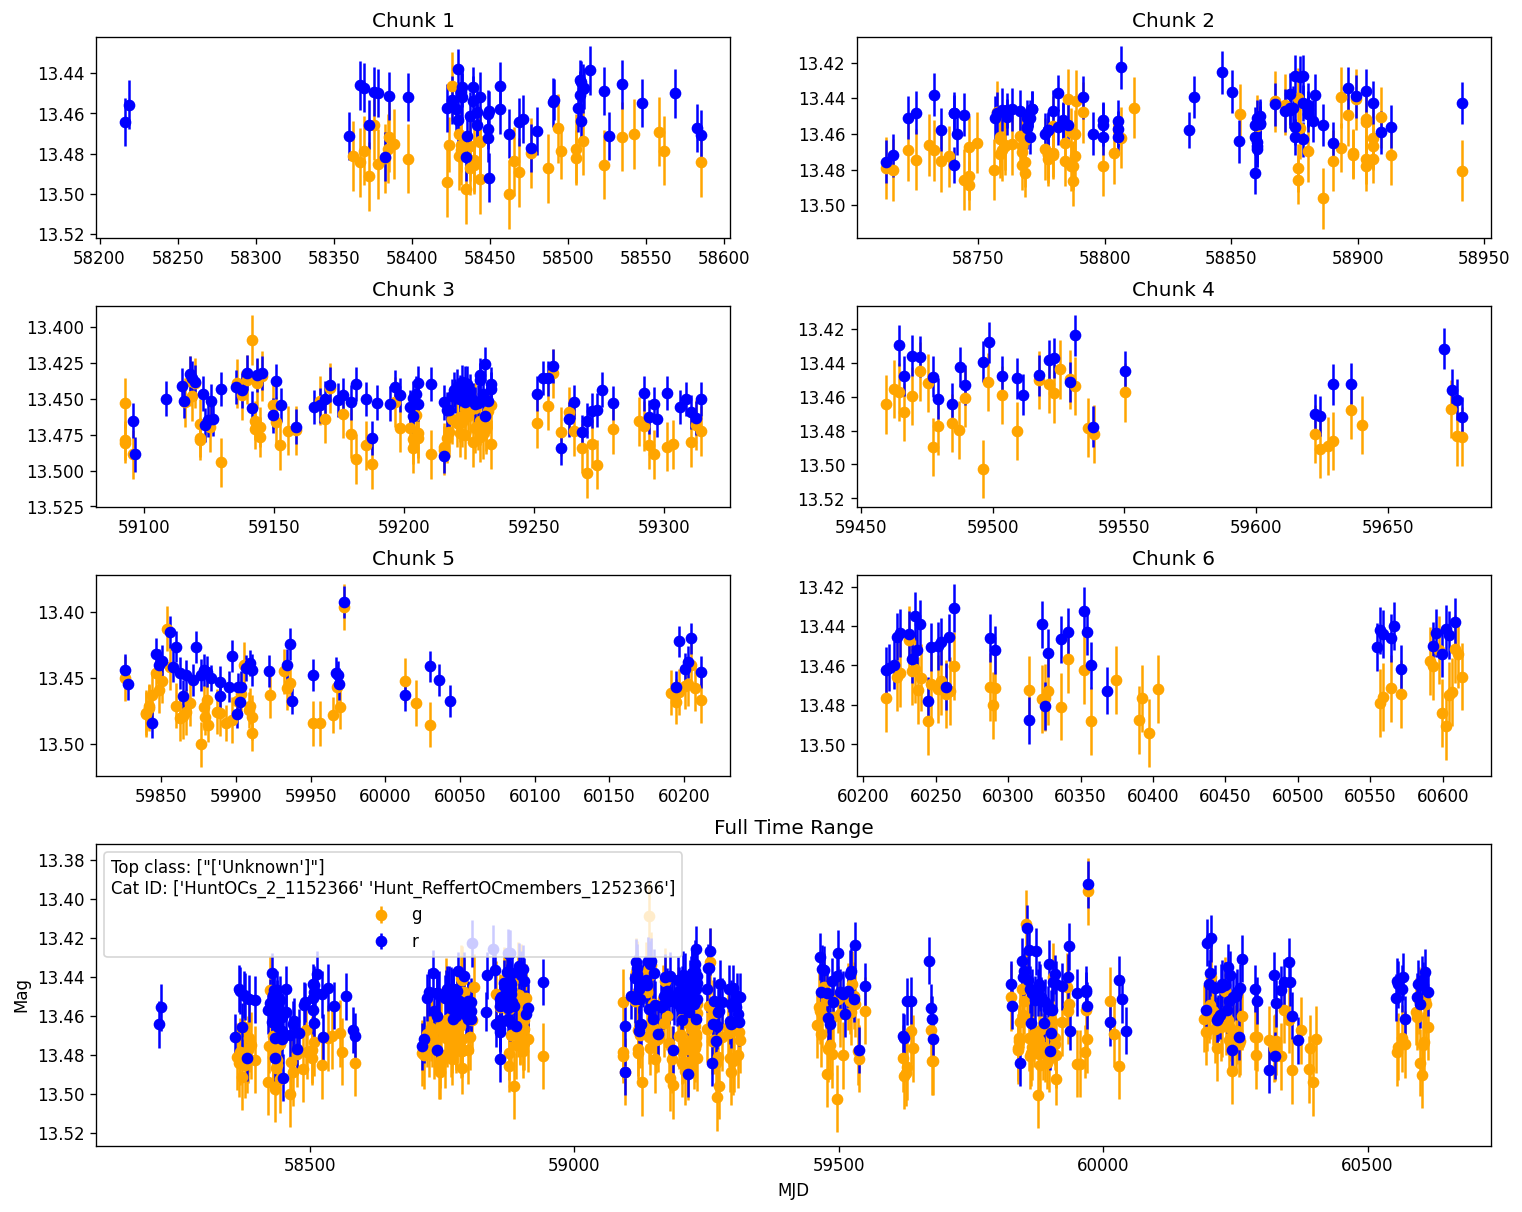

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


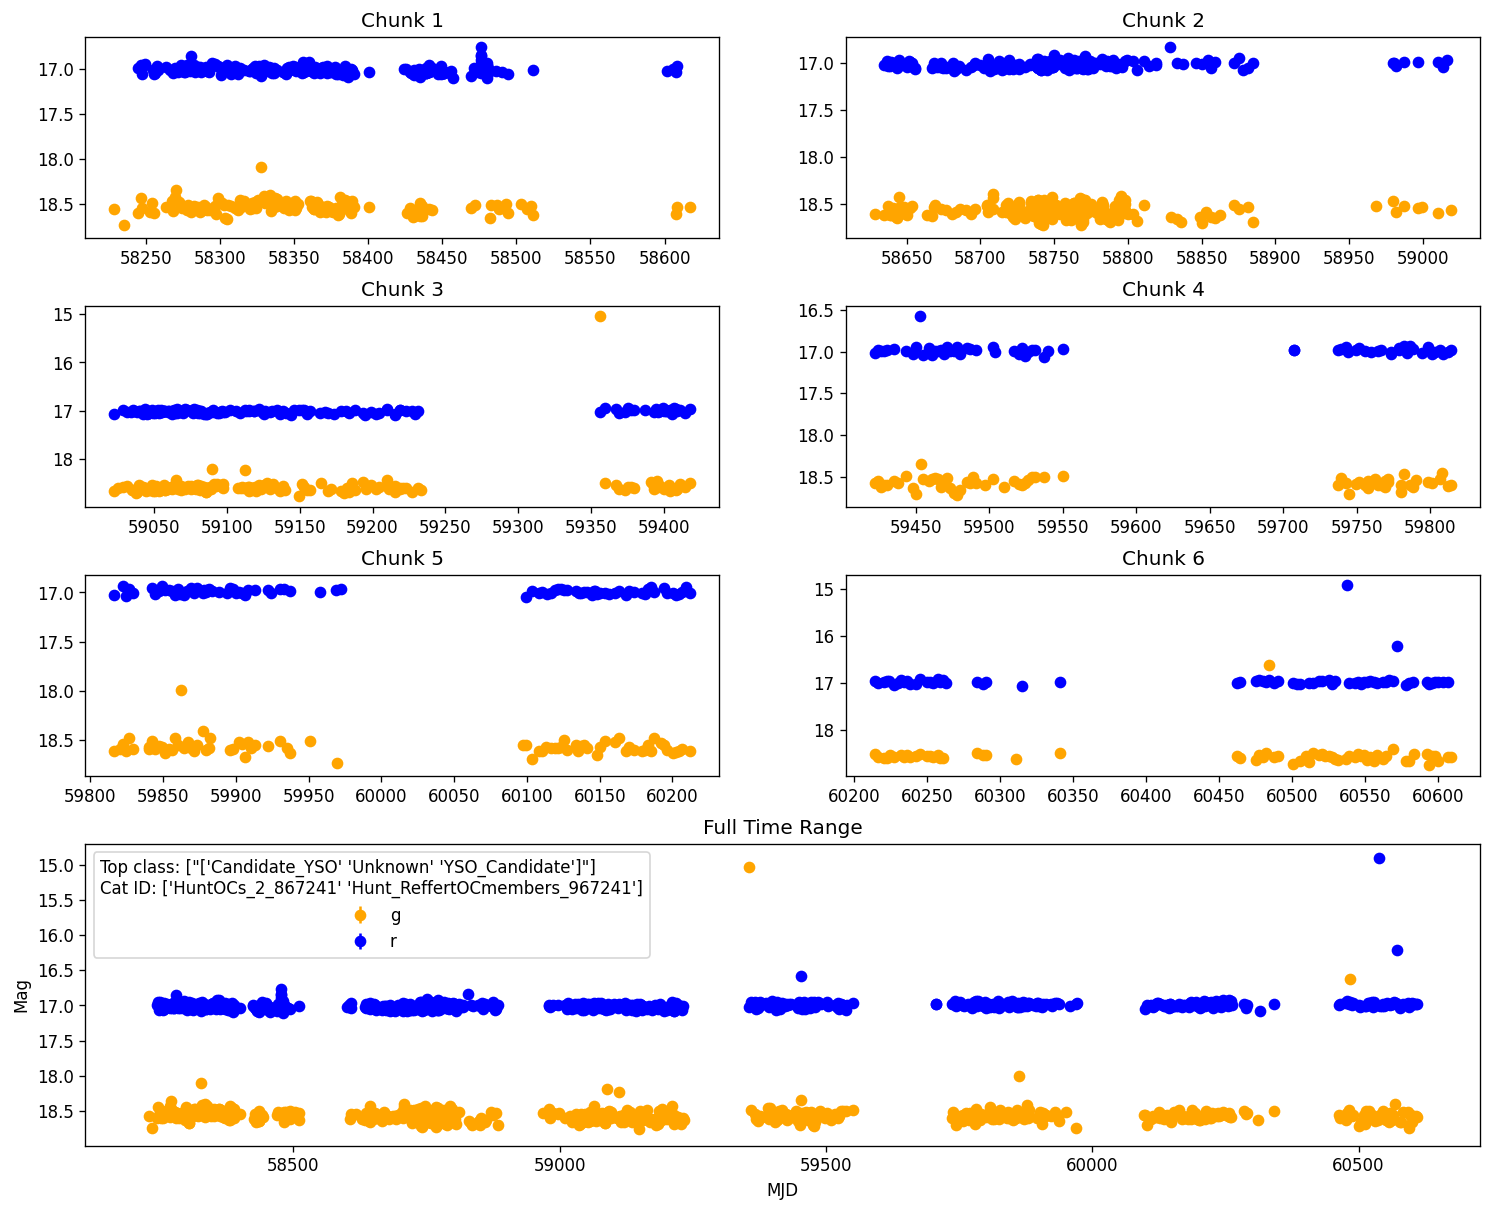

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


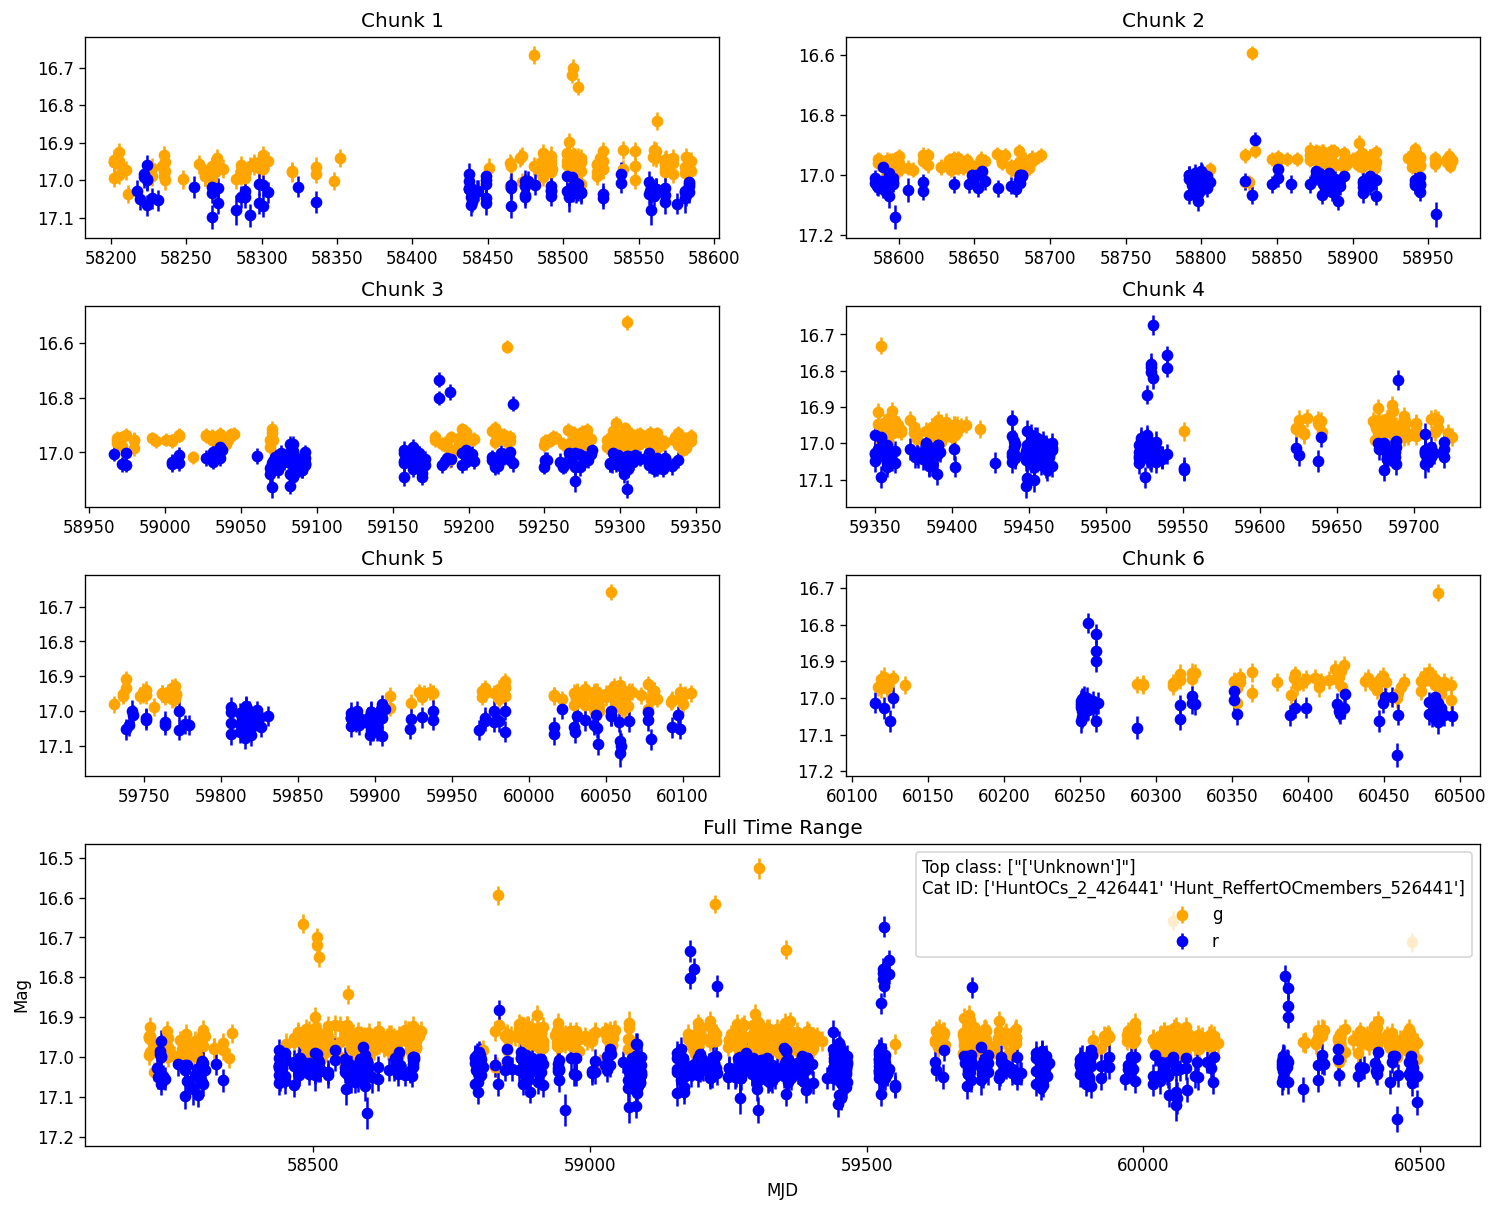

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


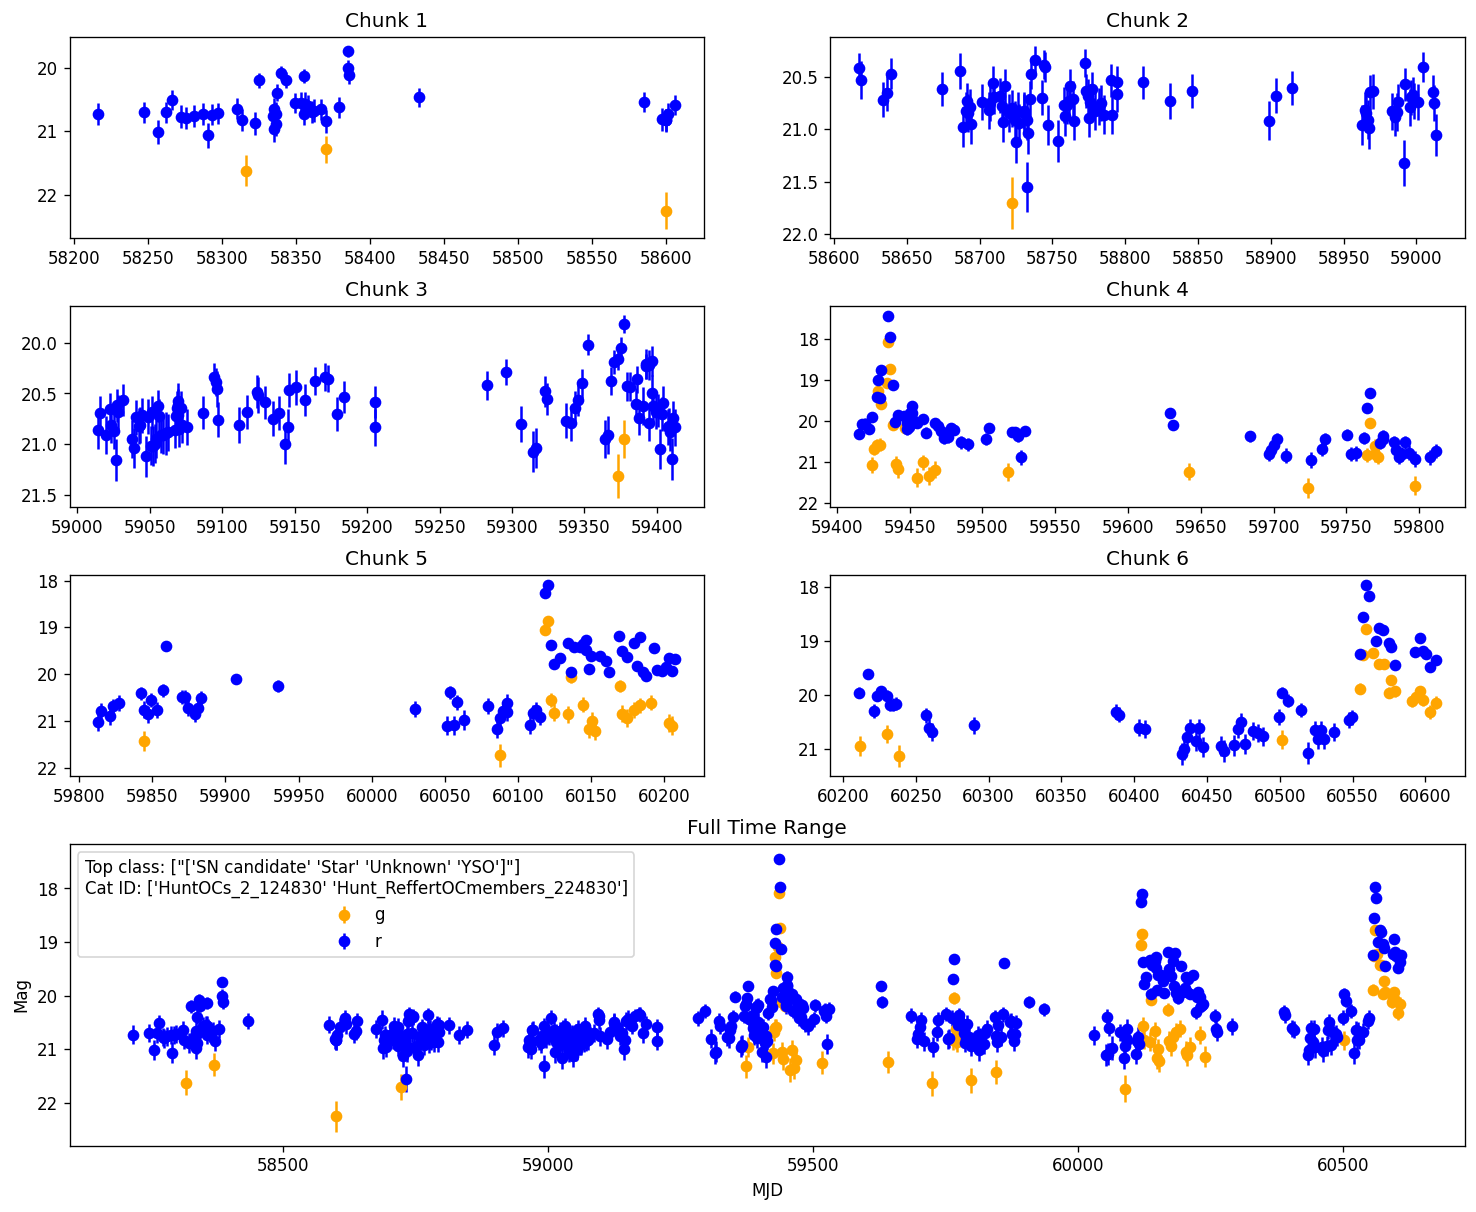

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


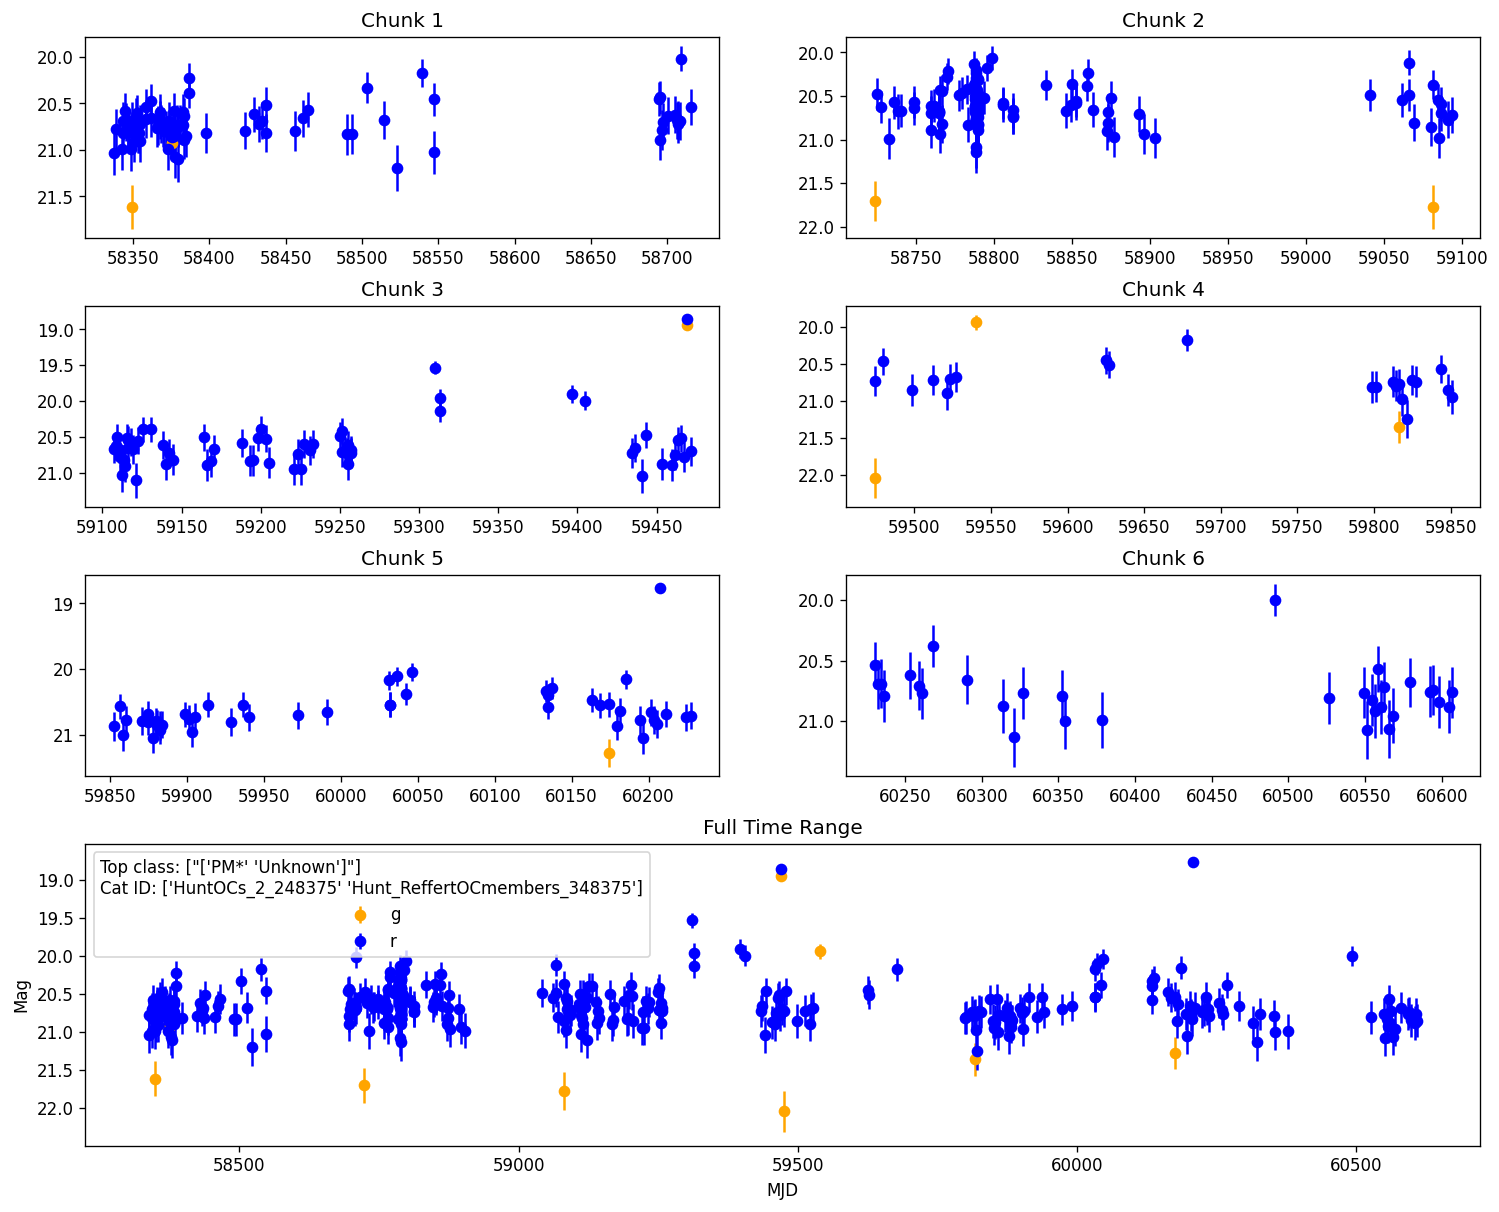

/tmp/ipykernel_577770/2065501564.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


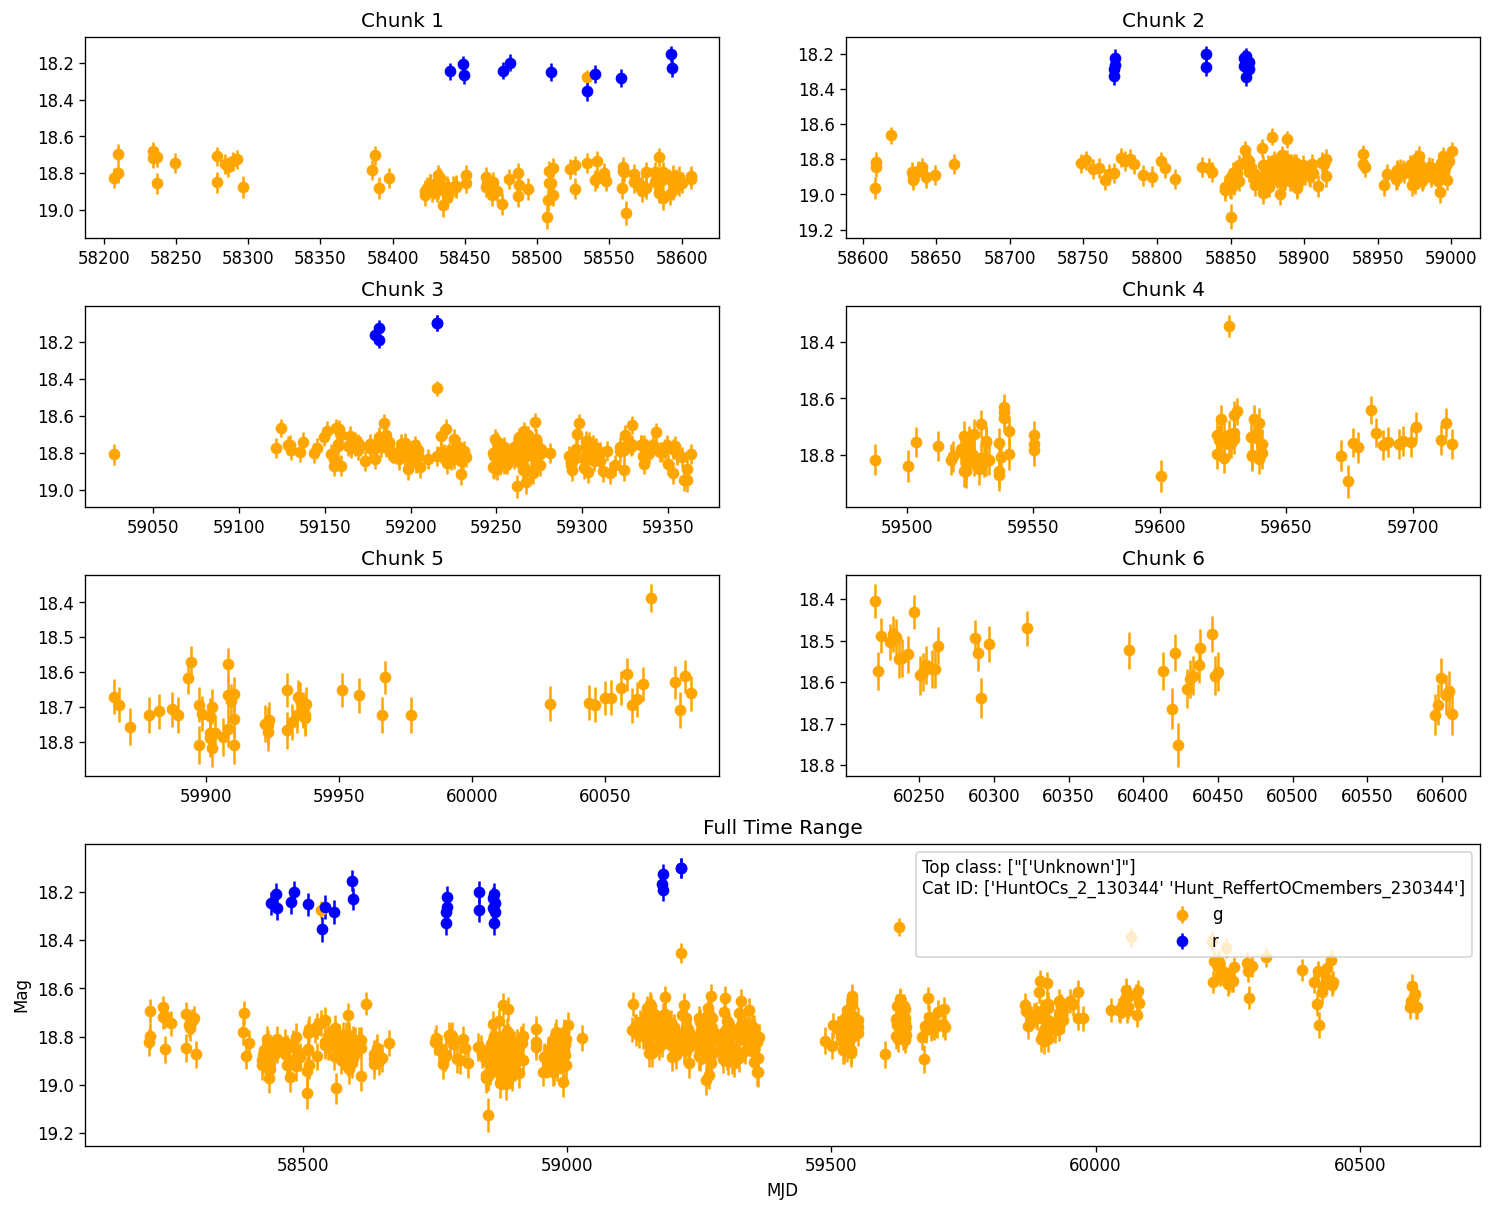

In [76]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import ast

band_colors = {'g': 'orange', 'r': 'blue'}

for idx, row in df_selected.iterrows():
    ztfid = row['ztf_id']
    
    # grab all rows with the same ztf_id
    row_alert = df_selected.loc[df_selected['ztf_id'] == ztfid]
    
    # pick a specific row index in row_alert (first row here)
    specific_idx = row_alert.index[0]
    cat_id_list = np.unique(ast.literal_eval(row_alert.loc[specific_idx, 'cat_id']))
    top_class_list = np.unique(row_alert['top_class'].explode())
    
    # Convert stringified lists to arrays
    mjd = np.array(ast.literal_eval(row['mjd']))
    mag = np.array(ast.literal_eval(row['mag']))
    magerr = np.array(ast.literal_eval(row['magerr']))
    bands = np.array(ast.literal_eval(row['band']))
    
    mjd_min, mjd_max = mjd.min(), mjd.max()
    dt = (mjd_max - mjd_min) / 6  # 6 chunks
    
    # Create figure with GridSpec
    fig = plt.figure(figsize=(15, 12), dpi=120)
    gs = gridspec.GridSpec(4, 2, height_ratios=[1,1,1,1.5], hspace=0.3, wspace=0.2)
    
    # Plot 6 chunks (2 columns x 3 rows)
    for i in range(6):
        row_idx = i // 2
        col_idx = i % 2
        ax = fig.add_subplot(gs[row_idx, col_idx])
        mask = (mjd >= mjd_min + i*dt) & (mjd < mjd_min + (i+1)*dt)
        for b in ['g','r']:
            ax.errorbar(
                mjd[mask & (bands==b)],
                mag[mask & (bands==b)],
                yerr=magerr[mask & (bands==b)],
                fmt='o',
                color=band_colors[b]
            )
        ax.invert_yaxis()
        ax.set_title(f"Chunk {i+1}")
    
    # Full-time plot (spans both columns at bottom)
    ax_full = fig.add_subplot(gs[3, :])
    for b in ['g','r']:
        mask = bands==b
        ax_full.errorbar(
            mjd[mask],
            mag[mask],
            yerr=magerr[mask],
            fmt='o',
            color=band_colors[b],
            label=b
        )
    ax_full.invert_yaxis()
    ax_full.set_title("Full Time Range")
    ax_full.set_xlabel("MJD")
    ax_full.set_ylabel("Mag")
    ax_full.legend(title=f"Top class: {top_class_list}\nCat ID: {cat_id_list}", fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'plots_visual_inspection/{ztfid}_combined_plot_wide.pdf', dpi=120)
    plt.show()


In [35]:
#data_all[data_all['Class']!='Unknown']